# **Classification - Tata Steel Machine Failure Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** **Manoj B**

# **Project Summary -**

**1. Project Objective**

This project aims to develop a machine learning model to predict machinery failures at TATA Steel's production facilities. The primary goal is to shift from reactive to proactive maintenance by anticipating equipment failures based on real-time operational data. This will enable TATA Steel to schedule repairs preemptively, minimizing costly unplanned downtime and optimizing production efficiency.

**2. Business Problem & Value**

Unexpected machine failures are a primary source of production loss and increased operational cost in steel manufacturing. This project directly addresses this by leveraging data analytics to forecast potential breakdowns. The key business value lies in reducing emergency maintenance expenses, extending the lifespan of critical machinery, and improving overall equipment effectiveness (OEE), leading to significant cost savings and more reliable production output.

**3. Scope & Methodology**

Using a dataset of key operational parameters (e.g., temperature, torque, rotational speed) and historical failure data, we will execute a complete data science workflow. This includes:

* Exploratory Data Analysis (EDA): To identify initial patterns and correlations related to failures.

* Data Pre-processing: To clean the data and prepare it for modeling, including handling any data imbalances.

* Model Development: To train and evaluate multiple classification algorithms to find the most accurate and reliable predictive model.

* Model Explainability: To provide clear insights into why the model predicts a failure, making the results actionable for maintenance teams.

**4. Expected Deliverable**

The final deliverable will be a validated predictive model capable of identifying machines at a high risk of failure, accompanied by a report detailing its performance and the key factors that drive its predictions.

# **GitHub Link -**

[GitHub: Capston_project_ML_Tata_Steel_Machine_Failure_Prediction](https://github.com/manojDOX/Capston_project_ML_Tata_Steel_Machine_Failure_Prediction)

# **Problem Statement**


TATA Steel experiences significant **financial losses** and **operational inefficiencies** due to unpredictable machinery failures, as the current maintenance strategy lacks a data-driven system to forecast these events and enable proactive, pre-emptive repairs.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
pip install scikit-optimize


  Using cached scikit_optimize-0.10.2-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached pyaml-25.7.0-py3-none-any.whl.metadata (12 kB)
Using cached scikit_optimize-0.10.2-py2.py3-none-any.whl (107 kB)
Using cached pyaml-25.7.0-py3-none-any.whl (26 kB)


In [ ]:
# --- Consolidated Library Imports ---
# This cell contains all the necessary libraries and modules for the entire
# data analysis and machine learning workflow.

# 1. Data Manipulation and Analysis
import pandas as pd
from collections import Counter

# 2. Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Statistical Analysis
from scipy import stats
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 4. Machine Learning Models
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# 5. Model Training, Tuning, and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

import joblib
# --- Optional: Suppress Warnings ---
# The following lines can be uncommented to hide warnings for a cleaner output.
# import warnings
# warnings.filterwarnings('ignore')

print("All necessary libraries have been imported successfully.")


All necessary libraries have been imported successfully.


### Dataset Loading

In [ ]:
# Load the primary dataset containing the features for the model.
# The data is being read directly from a CSV file hosted on Google Drive.
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Uq359_cmz-o-I2eEnUJpzPU500QdsH5U')

# Load the corresponding target variable dataset.
# This separate CSV file contains the labels or target values for the feature set.
df_target = pd.read_csv('https://drive.google.com/uc?export=download&id=1PkKCBevYF02B3dRUYcWXp5CPMRVMHJ9X')


### Dataset First View

In [ ]:
# Display the first few rows of the feature dataset.
# The .head() method is used for a quick initial inspection of the data,
# showing the column headers and the first 5 records by default.
# This helps in understanding the structure and format of the data.
df.head()


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### Dataset Rows & Columns count

In [ ]:
# Get the dimensions of the dataset (rows and columns).
# The .shape attribute of a pandas DataFrame returns a tuple
# where the first element is the number of rows and the second is the number of columns.
rows, columns = df.shape

# Print the dimensions using an f-string for clear, formatted output.
# This provides a quick summary of the size of the dataset.
print(f'The dataset has {rows} rows and {columns} columns.')


The dataset has 136429 rows and 14 columns.


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

#### Duplicate Values

In [ ]:
# Count the total number of duplicate rows in the dataset.
# The .duplicated() method identifies duplicate rows, and .sum() provides a count.
duplicate_row_count = df.duplicated().sum()

# Display the result. Identifying duplicates is a key data cleaning step.
print(f"The dataset contains {duplicate_row_count} duplicate rows.")



The dataset contains 0 duplicate rows.


#### Missing Values/Null Values

In [ ]:
# Check for missing (null or NaN) values in each column of the dataset.
# The .isnull() method returns a DataFrame of the same size as the original,
# with boolean values indicating the presence of missing data.
# The .sum() method then aggregates these boolean values column-wise,
# providing a total count of missing values for each feature.
missing_value_counts = df.isnull().sum()

# Display the counts of missing values for each column.
# This is a crucial step to identify columns that may require imputation
# or other data cleaning techniques before modeling.
print("Missing values per column:")
print(missing_value_counts)


Missing values per column:
id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


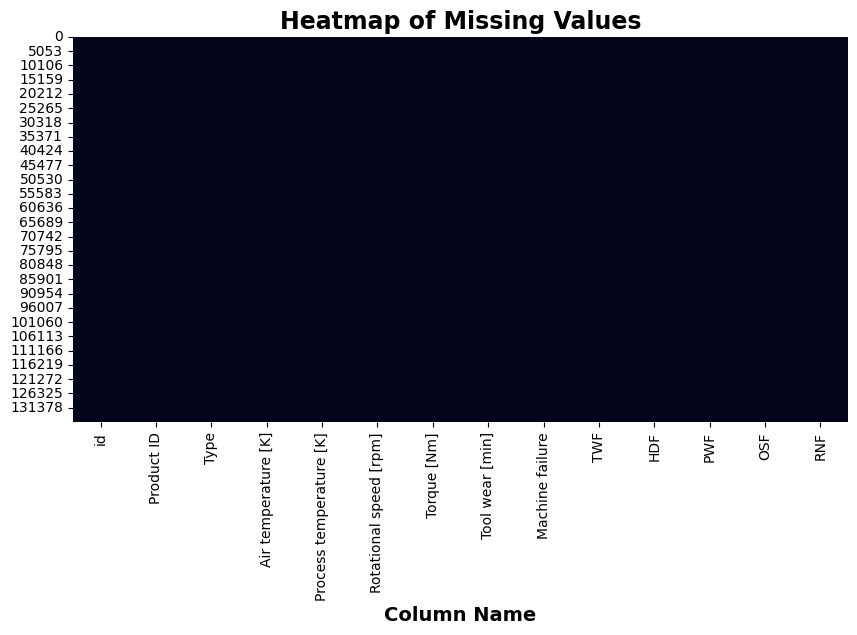

In [ ]:
# Set the dimensions for the upcoming plot to ensure it's easily readable.
# A figure size of 10x5 inches is chosen for a clear horizontal layout.
plt.figure(figsize=(10, 5))

# Generate a heatmap to visually represent the missing values in the dataset.
# 'df.isnull()' creates a boolean DataFrame where True indicates a missing value.
# 'seaborn.heatmap' then plots this DataFrame, highlighting missing values.
# 'cbar=False' is set because a color bar is not necessary for a simple boolean (True/False) visualization.
sns.heatmap(df.isnull(), cbar=False)

# Add a label to the x-axis for clarity.
plt.xlabel("Column Name", size=14, weight="bold")

# Add a title to the plot to describe its purpose.
plt.title("Heatmap of Missing Values", fontweight="bold", size=17)

# Render and display the generated plot.
plt.show()


### What did you know about your dataset?

The dataset is clean with no missing values. It contains numerical predictors, a single categorical feature (Type), and a binary target variable (Machine failure) that indicates whether a failure occurred. The column names need to be standardized for cleaner code.

## ***2. Understanding Your Variables***

In [ ]:
# Iterate through the columns of the DataFrame to list all feature names.
# 'df.columns' returns an index object containing all column labels.
# 'enumerate' is used here with a starting value of 1 to get both the
# numerical index and the column name during each iteration. This provides a
# clean, numbered list of all features in the dataset.
print("Listing all columns in the dataset:")
for index, column_name in enumerate(df.columns, start=1):
    # Print each column name prefixed with its number.
    print(f"{index}. {column_name}")


Listing all columns in the dataset:
1. id
2. Product ID
3. Type
4. Air temperature [K]
5. Process temperature [K]
6. Rotational speed [rpm]
7. Torque [Nm]
8. Tool wear [min]
9. Machine failure
10. TWF
11. HDF
12. PWF
13. OSF
14. RNF


In [ ]:
# Generate descriptive statistics for the numerical columns in the DataFrame.
# The .describe() method computes a summary of statistics pertaining to the
# DataFrame's columns, including count, mean, standard deviation, min, max,
# and quartile values. This is essential for getting a quick overview of the
# distribution and scale of each numerical feature.
#
# The .T attribute is used to transpose the resulting DataFrame.
# By default, .describe() lists statistical measures as rows and features as columns.
# Transposing flips this, listing features as rows and statistics as columns,
# which can be much more convenient and readable, especially with many features.
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,136429.0,68214.000000,39383.804275,0.0,34107.0,68214.0,102321.0,136428.0
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Generate descriptive statistics for the categorical (object type) columns.
# The .describe() method can be tailored to summarize non-numerical data
# by passing the argument include='object'.
#
# This summary provides:
# - count: The number of non-null entries.
# - unique: The number of unique categories within the column.
# - top: The most frequently occurring category.
# - freq: The frequency of the 'top' category.
#
# This is a powerful way to quickly understand the distribution and
# common values in the categorical features of the dataset.
# The .T attribute is used to transpose the output for better readability,
# listing the columns as rows.
df.describe(include='object').T


,count,unique,top,freq
Product ID,136429,9976,L53257,139
Type,136429,3,L,95354


### Variables Description

* **Type :** Indicates the quality of the product, classified into categories such as Low, Medium, or High.
* **Air Temperature \[K] :** Represents the air temperature, which is simulated using a random process and adjusted to have a certain variability around a standard value.
* **Process Temperature \[K] :** Represents the temperature within the process, generated with a slight increase over the air temperature and adjusted to a specific variability.
* **Rotational Speed \[rpm] :** Describes the speed at which the machine operates, calculated based on a fixed power level with added random variation.
* **Torque \[Nm] :** Measures the force applied by the machine, distributed around a certain average value with specific variation, ensuring positive values only.
* **Tool Wear \[min] :** Indicates the wear on the tool, with the duration increasing based on the quality category of the product.
* **Machine Failure :** Indicates whether the machine has experienced a failure, with several types of failures described.
* **Tool Wear Failure :** Occurs when the tool is replaced or fails after a certain amount of usage time, which is randomly determined within a specific range.
* **Heat Dissipation Failure :** Happens if the temperature difference between the air and process is too small and the machine speed is below a certain threshold.
* **Power Failure :** Occurs when the power required for the process, calculated from torque and speed, falls outside of a defined acceptable range.
* **Overstrain Failure :** Occurs if the combined effect of tool wear and torque exceeds specific limits based on the product quality.
* **Random Failures :** Represents a small probability of failure occurring randomly, independent of other process parameters.

### Check Unique Values for each variable.

In [ ]:
# Analyze and display unique values for columns with a limited number of distinct entries.
# This process is crucial for identifying categorical or discrete features within the dataset.
# By setting a threshold (in this case, 40), we can filter for columns that are not
# continuous and inspect their unique values directly.

print("Inspecting unique values for discrete columns (threshold < 40):")

# A counter to number the output list for better readability.
column_counter = 1

# Iterate over each column in the DataFrame.
for column_name in df.columns:
    # Check if the number of unique values in the column is less than 40.
    if df[column_name].nunique() < 40:
        # If the condition is met, print the column's details.
        print(f"\n{column_counter}) Column: '{column_name}'")
        print(f"   - Unique Values Count: {df[column_name].nunique()}")
        print(f"   - Values: {df[column_name].unique()}")

        # Increment the counter for the next identified column.
        column_counter += 1


Inspecting unique values for discrete columns (threshold < 40):

1) Column: 'Type'
   - Unique Values Count: 3
   - Values: ['L' 'M' 'H']

2) Column: 'Machine failure'
   - Unique Values Count: 2
   - Values: [0 1]

3) Column: 'TWF'
   - Unique Values Count: 2
   - Values: [0 1]

4) Column: 'HDF'
   - Unique Values Count: 2
   - Values: [0 1]

5) Column: 'PWF'
   - Unique Values Count: 2
   - Values: [0 1]

6) Column: 'OSF'
   - Unique Values Count: 2
   - Values: [0 1]

7) Column: 'RNF'
   - Unique Values Count: 2
   - Values: [0 1]


In [ ]:
# Identify and summarize continuous variables in the dataset.
# A continuous variable is identified here as any column with a large number
# of unique values (threshold >= 40). For these columns, it is not practical
# to list all unique values. Instead, we summarize them by their count of
# unique values and their range (minimum and maximum). This helps in
# understanding the scale and spread of numerical features.

print("Inspecting unique values for continuous columns (threshold >= 40):")

# A counter to number the output list for better readability.
column_counter = 1

# Iterate over each column in the DataFrame.
for column_name in df.columns:
    # Check if the number of unique values in the column is 40 or more.
    if df[column_name].nunique() >= 40:
        # If the condition is met, print a summary for the continuous column.
        print(f"\n{column_counter}) Column: '{column_name}'")
        print(f"   - Unique Values Count: {df[column_name].nunique()}")
        # For continuous columns, showing the range is more informative than listing values.
        print(f"   - Range: From {df[column_name].min()} to {df[column_name].max()}")

        # Increment the counter for the next identified column.
        column_counter += 1


Inspecting unique values for continuous columns (threshold >= 40):

1) Column: 'id'
   - Unique Values Count: 136429
   - Range: From 0 to 136428

2) Column: 'Product ID'
   - Unique Values Count: 9976
   - Range: From H29424 to M24859

3) Column: 'Air temperature [K]'
   - Unique Values Count: 95
   - Range: From 295.3 to 304.4

4) Column: 'Process temperature [K]'
   - Unique Values Count: 81
   - Range: From 305.8 to 313.8

5) Column: 'Rotational speed [rpm]'
   - Unique Values Count: 952
   - Range: From 1181 to 2886

6) Column: 'Torque [Nm]'
   - Unique Values Count: 611
   - Range: From 3.8 to 76.6

7) Column: 'Tool wear [min]'
   - Unique Values Count: 246
   - Range: From 0 to 253


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Define a comprehensive function for cleaning the dataset.
# This function encapsulates two key data pre-processing steps:
# 1. Handling Missing Values: Imputes or removes nulls based on specific criteria.
# 2. Handling Duplicate Entries: Removes redundant rows from the dataset.

def data_wrangling(dataframe, operation='missing'):
    """
    Cleans the input DataFrame by handling missing values or duplicate rows.
    The function modifies the DataFrame in place.

    Args:
        dataframe (pd.DataFrame): The DataFrame to be cleaned.
        operation (str): The cleaning operation to perform.
                         - 'missing': Handles null values.
                         - 'duplicate': Removes duplicate rows.
    """
    if operation == 'missing':
        print("--- Initiating Missing Value Handling ---")

        # Iterate through each column to check for and handle missing values.
        for col_name in dataframe.columns:
            # Calculate the percentage of missing values in the column.
            missing_percentage = dataframe[col_name].isnull().sum() * 100 / len(dataframe)

            # If a column has no missing values, skip it.
            if missing_percentage == 0:
                continue

            print(f"\nColumn: '{col_name}' ({missing_percentage:.2f}% missing)")

            # Strategy 1: Drop columns with a high percentage (>40%) of missing data.
            if missing_percentage > 40:
                dataframe.drop(col_name, axis=1, inplace=True)
                print(f"  -> Action: Dropped column.")
            else:
                # Strategy 2: Impute missing values for numeric columns based on skewness.
                if pd.api.types.is_numeric_dtype(dataframe[col_name]):
                    skewness = dataframe[col_name].skew()
                    # Use median for skewed data (absolute skewness > 0.5).
                    if abs(skewness) > 0.5:
                        median_val = dataframe[col_name].median()
                        dataframe[col_name].fillna(median_val, inplace=True)
                        print(f"  -> Action: Filled with MEDIAN ({median_val}) due to skewness ({skewness:.2f}).")
                    # Use mean for data that is not significantly skewed.
                    else:
                        mean_val = dataframe[col_name].mean()
                        dataframe[col_name].fillna(mean_val, inplace=True)
                        print(f"  -> Action: Filled with MEAN ({mean_val:.2f}) due to low skewness ({skewness:.2f}).")
                # Strategy 3: Impute missing values for non-numeric columns with the mode.
                else:
                    mode_val = dataframe[col_name].mode()[0]
                    dataframe[col_name].fillna(mode_val, inplace=True)
                    print(f"  -> Action: Filled with MODE ('{mode_val}').")

    elif operation == 'duplicate':
        print("\n--- Initiating Duplicate Row Handling ---")
        duplicate_count = dataframe.duplicated().sum()

        if duplicate_count == 0:
            print("  -> No duplicate rows found.")
        else:
            dataframe.drop_duplicates(inplace=True)
            print(f"  -> Removed {duplicate_count} duplicate rows.")

# Example of how to call the function:
# data_wrangling(df, operation='missing')
# data_wrangling(df, operation='duplicate')


In [ ]:
data_wrangling(df.select_dtypes(include='number'),'missing')
data_wrangling(df,'duplicate')

--- Initiating Missing Value Handling ---

--- Initiating Duplicate Row Handling ---
  -> No duplicate rows found.


In [ ]:
# --- Plotting Helper Function ---
# This cell defines a reusable function to add percentage labels to bar charts.
# This improves readability and makes the charts more informative.

def add_percentage_labels(ax):
    """
    Adds percentage labels to a bar chart.

    This helper function iterates through the patches (bars) of a given Axes object,
    calculates the percentage of each bar relative to the total sum of all bars,
    and annotates each bar with its percentage value.

    Args:
        ax (matplotlib.axes.Axes): The Axes object containing the bar chart.
    """
    # Calculate the total sum of the heights of all bars for percentage calculation.
    # This makes the function self-contained and easier to use.
    total = sum(p.get_height() for p in ax.patches if p.get_height() is not None)

    # Iterate over each bar in the plot ('ax.patches').
    for p in ax.patches:
        # Get the height of the current bar.
        height = p.get_height()

        # Skip labeling if height is None or zero to avoid errors.
        if height is None or height == 0:
            continue

        # Format the percentage string.
        percentage = f'{(height / total) * 100:.1f}%'

        # Determine the x and y coordinates for placing the text.
        # x is the center of the bar.
        # y is the top of the bar.
        x = p.get_x() + p.get_width() / 2
        y = height

        # Add the annotation (the percentage text) to the plot.
        # `ha` and `va` control the alignment of the text.
        ax.annotate(
            text=percentage,
            xy=(x, y),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )



### What all manipulations have you done and insights you found?

The key insight is that the **dataset is clean**, confirming high data integrity with no missing values or duplicates. This means we can trust the raw data and move directly to exploratory analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

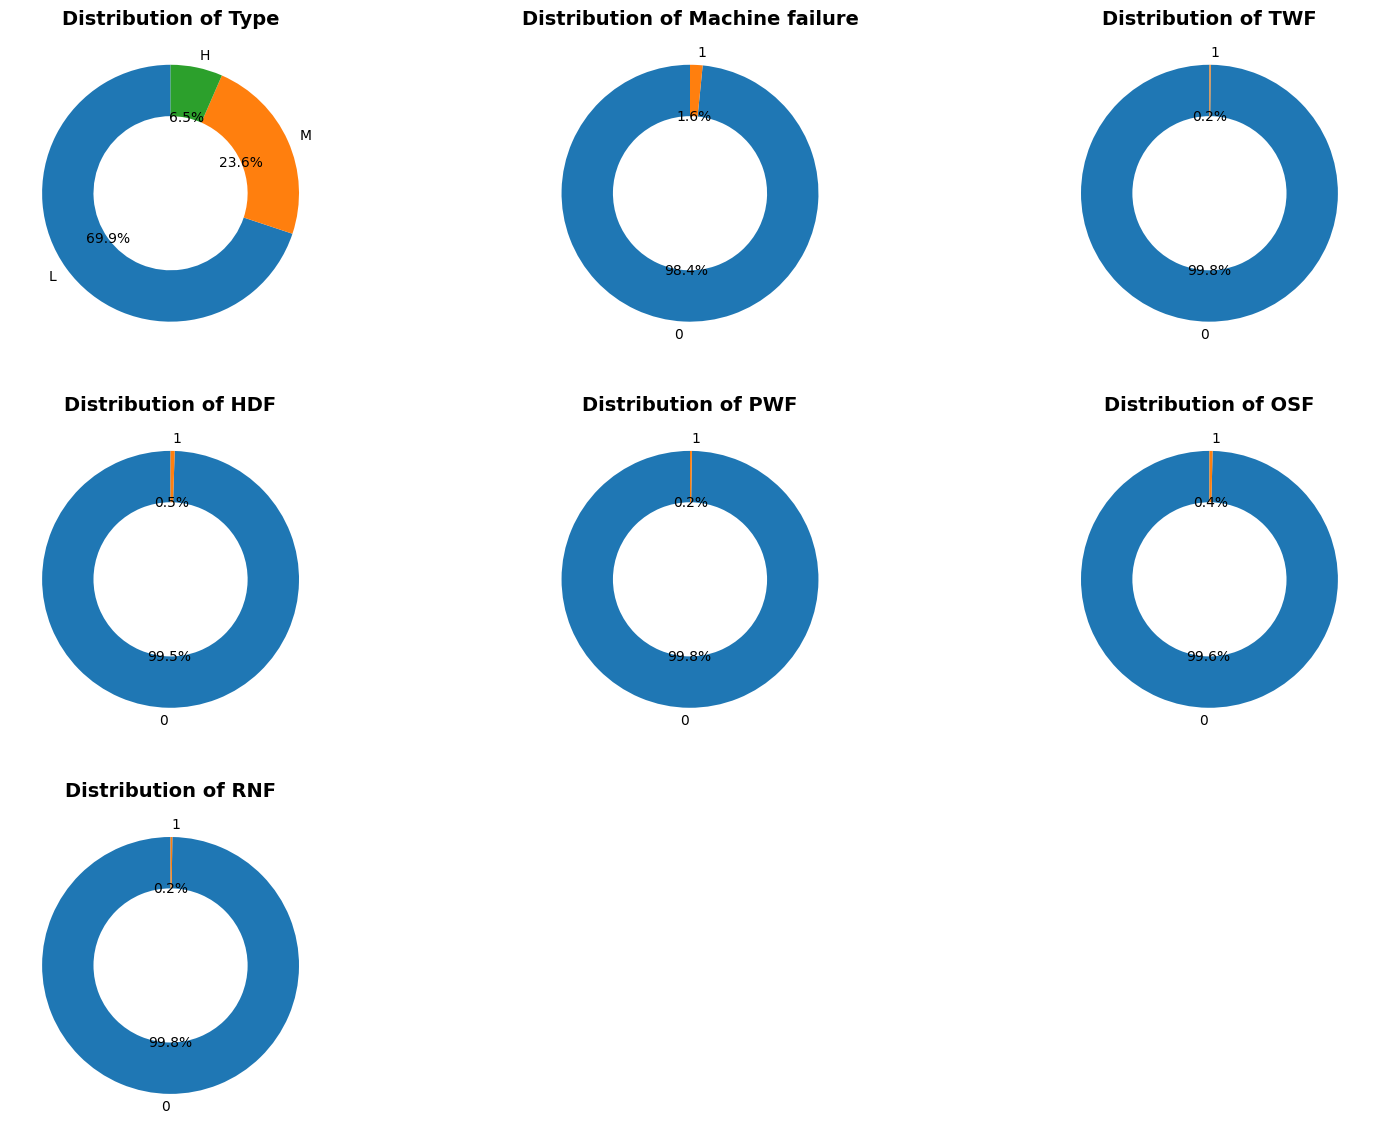

In [ ]:
# --- Chart 1: Distribution of Categorical Features ---
# This cell creates a series of donut-style pie charts to visualize the
# distribution of key discrete variables. This helps in understanding the
# proportion of each category within these features.

# Define the list of discrete columns to be visualized.
discrete_cols = ['Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Create a figure and a grid of subplots. A 3x3 grid is suitable for 7 plots.
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
# Flatten the 2D array of axes to make it easier to iterate over them sequentially.
axes = axes.flatten()

# Generate a pie chart for each specified discrete column.
for i, col_name in enumerate(discrete_cols):
    # Select the current axis for plotting.
    ax = axes[i]

    # Check if the column contains any unique values before attempting to plot.
    if df[col_name].nunique() > 0:
        # Tally the occurrences of each unique value in the column.
        value_counts = df[col_name].value_counts()

        # Create the pie chart on the current axis.
        ax.pie(value_counts,
               labels=value_counts.index,  # Set labels for each wedge.
               autopct='%1.1f%%',           # Format the percentage display on each wedge.
               startangle=90,              # Rotate the chart to start the first wedge at the top.
               wedgeprops=dict(width=0.4), # Create a donut effect by setting a width for the wedges.
               textprops={'fontsize': 10}) # Adjust font size for readability.

        # Set a title for each individual pie chart.
        ax.set_title(f'Distribution of {col_name}', fontsize=14, fontweight='bold')
    else:
        # If a column has no data, hide the corresponding subplot.
        ax.set_visible(False)

# After plotting, hide any remaining subplots in the grid that were not used.
# This ensures a clean layout if the number of plots is not a perfect square/rectangle.
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust the overall layout to prevent titles and labels from overlapping.
plt.tight_layout(pad=3.0)
# Display the generated plots.
plt.show()



##### 1. Why did you pick the specific chart?

To show the class distribution of product quality and different machine failure types in a simple, visual way.

##### 2. What is/are the insight(s) found from the chart?

* Majority of products are of Low quality (≈70%).
* Machine failures and specific failure types (TWF, HDF, PWF, OSF, RNF) are very rare (<2%).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes – it shows opportunity to **improve product quality mix** (increase Medium/High output) while maintaining machine reliability.
The low failure rates are positive for minimizing downtime and costs, but the high share of Low-quality products may negatively affect revenue and customer satisfaction if not addressed.

#### Chart - 2

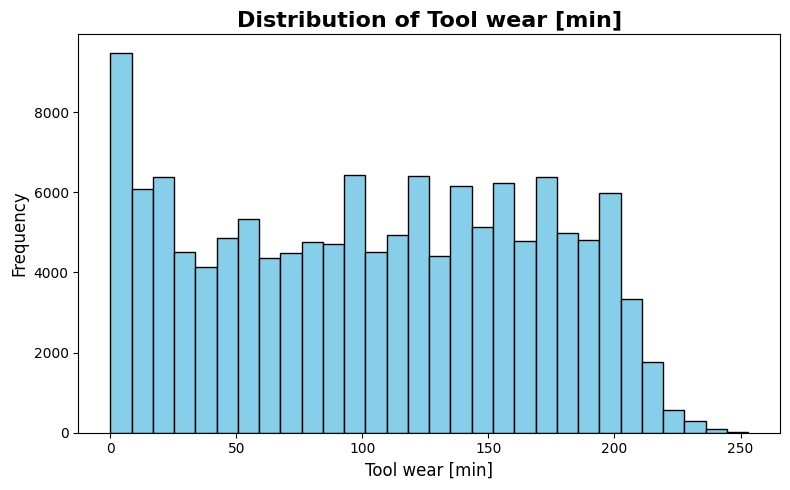

In [ ]:
# --- Chart 2: Distribution of Tool Wear ---
# This cell visualizes the distribution of the 'Tool wear [min]' column using a histogram.
# A histogram is useful for understanding the underlying frequency distribution (shape) of a
# continuous variable, including its central tendency, spread, and skewness.

# Set the size of the plot for better visibility.
plt.figure(figsize=(8, 5))

# Create a histogram of the 'Tool wear [min]' column.
# 'bins=30' specifies that the data should be divided into 30 intervals,
# which helps in visualizing the distribution in detail.
plt.hist(df['Tool wear [min]'], bins=30, color='skyblue', edgecolor='black')

# Set the title of the histogram with appropriate font styling.
plt.title('Distribution of Tool wear [min]', fontsize=16, fontweight='bold')

# Label the x-axis to indicate what the values represent.
plt.xlabel('Tool wear [min]', fontsize=12)

# Label the y-axis to show that it represents the frequency of occurrences.
plt.ylabel('Frequency', fontsize=12)

# Adjust the plot to ensure that all elements fit without overlapping.
plt.tight_layout()

# Display the generated plot.
plt.show()


##### 1. Why did you pick the specific chart?

A histogram was chosen because it's the best tool for understanding the lifecycle of our machine tools. It clearly shows us how many tools are at different stages of wear and tear, measured in minutes. For TATA Steel, this helps us see the overall pattern of how long our tools last, from brand new to fully worn out.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can see three key things:

1. High Number of New Tools: There is a very large spike on the far left, which shows a high frequency of tools with very little wear (0-10 minutes). This indicates that new tools are constantly being put into operation.

2. Wear is Widely Spread: After the initial period, tool wear is spread out across a wide range (from about 25 to 200 minutes). There isn't one specific time when most tools fail; they can wear out at almost any point in this window.

3. Clear End-of-Life: Very few tools last longer than 225 minutes. This suggests a maximum lifespan, after which nearly all tools are either replaced or have failed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Yes. The chart proves that a simple time-based replacement schedule would be inefficient. This justifies TATA Steel's need for a predictive model to save costs and reduce downtime.

**Insight Highlighting a Business Problem:**

The unpredictable wear suggests our current maintenance is reactive (fixing things after they break), leading to unplanned production stops that hurt growth. Our predictive model is designed to solve this exact problem.

#### Chart - 3

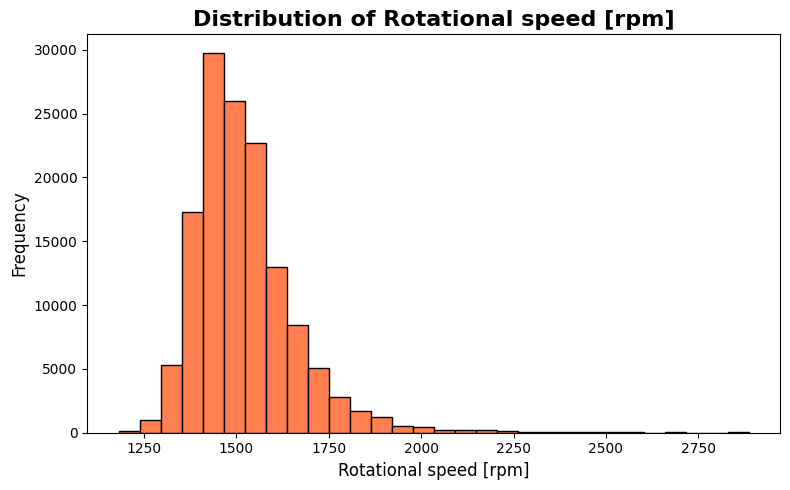

In [ ]:
# --- Chart 3: Distribution of Rotational Speed ---
# This cell visualizes the distribution of the 'Rotational speed [rpm]' column.
# A histogram is used to understand the frequency distribution of this continuous
# variable, revealing its shape, central tendency, and spread.

# Set the size of the figure for clear visualization.
plt.figure(figsize=(8, 5))

# Generate a histogram for the 'Rotational speed [rpm]' column.
# The data is divided into 30 bins to provide a detailed view of the distribution.
plt.hist(df['Rotational speed [rpm]'], bins=30, color='coral', edgecolor='black')

# Add a title to the plot with descriptive font styling.
plt.title('Distribution of Rotational speed [rpm]', fontsize=16, fontweight='bold')

# Label the x-axis to clarify the data being measured.
plt.xlabel('Rotational speed [rpm]', fontsize=12)

# Label the y-axis to indicate it represents frequency.
plt.ylabel('Frequency', fontsize=12)

# Ensure all plot elements are neatly arranged without overlapping.
plt.tight_layout()

# Display the final plot.
plt.show()


##### 1. Why did you pick the specific chart?

A histogram was chosen to clearly visualize the most common operating speeds of our machines. It helps establish a baseline for what is considered a "normal" speed range during production.

##### 2. What is/are the insight(s) found from the chart?



1.  Machine operations are highly consistent, with most activity concentrated in a narrow band around **1400-1600 RPM**. This is the standard operating speed.
2.  Speeds above 1800 RPM are rare anomalies, representing significant deviations from the standard process.
3.  These high-speed events are likely indicators of machine stress or unusual production conditions.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact:**

Yes. This chart defines the "normal" operating state. Our predictive model can now be trained to recognize speeds outside this normal range as potential warning signs for failure. This allows TATA Steel to move from reactive to proactive maintenance, preventing costly production halts.

**Insight Highlighting a Business Problem:**

The chart reveals that while rare, high-speed operations do occur. These anomalies could be causing accelerated wear and leading to unexpected breakdowns. If left unmanaged, these events contribute to unplanned downtime and equipment damage, which directly hinders production and leads to negative growth. Our model will investigate if these speed deviations are a primary cause of failures.

#### Chart - 4

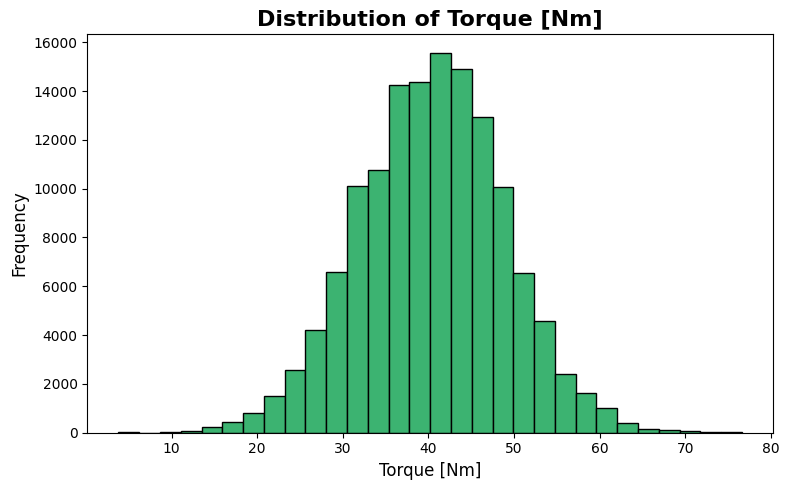

In [ ]:
# --- Chart 4: Distribution of Torque ---
# This cell creates a histogram to visualize the distribution of the 'Torque [Nm]' column.
# This helps in understanding the frequency distribution of this continuous variable,
# including its central tendency, spread, and overall shape.

# Set the size of the figure for better readability.
plt.figure(figsize=(8, 5))

# Generate a histogram for the 'Torque [Nm]' column.
# Using 30 bins provides a detailed look at the data's distribution.
plt.hist(df['Torque [Nm]'], bins=30, color='mediumseagreen', edgecolor='black')

# Add a descriptive title to the plot with styled font.
plt.title('Distribution of Torque [Nm]', fontsize=16, fontweight='bold')

# Label the x-axis to clarify what is being measured.
plt.xlabel('Torque [Nm]', fontsize=12)

# Label the y-axis to indicate it represents frequency.
plt.ylabel('Frequency', fontsize=12)

# Adjust plot elements to fit neatly within the figure area.
plt.tight_layout()

# Display the finalized plot.
plt.show()


##### 1. Why did you pick the specific chart?

A **histogram** was used to understand the typical range of force (torque) applied by the machines during operation. It helps define what a normal operational load looks like.

##### 2. What is/are the insight(s) found from the chart?

1.  The torque applied by the machines follows a consistent and predictable pattern, with the vast majority of operations occurring around **35-45 Nm**.
2.  Extremely low (< 20 Nm) or high (> 60 Nm) torque values are very rare and represent significant deviations from the standard operating procedure.
3.  This consistent bell-curve shape establishes a clear baseline for "normal" machine load.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Yes. By defining the normal torque range, our predictive model can instantly flag operations where the torque is abnormally high or low. For TATA Steel, these flags can serve as early warnings for potential "Overstrain" or "Power" failures, allowing for intervention *before* a breakdown occurs, thus reducing downtime and maintenance costs.

**Insight Highlighting a Business Problem:**

The chart highlights that rare but extreme high-torque events do happen. These events are a significant business risk as they can cause immediate damage or accelerate wear, leading to unexpected failures and costly production stoppages. These incidents directly oppose business growth by causing inefficiency and equipment loss. Our model must investigate if these torque spikes are a primary driver of machine failures.

#### Chart - 5

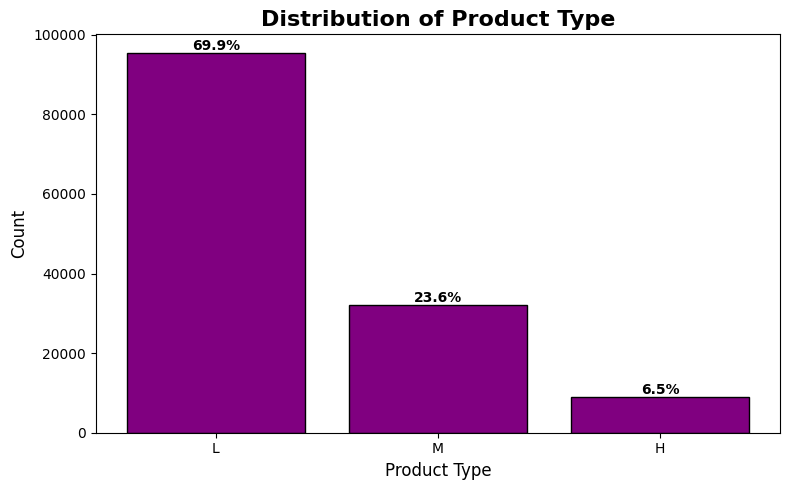

In [ ]:
# --- Chart 5: Distribution of Product Type ---
# This cell visualizes the distribution of different product types in the dataset.
# A bar chart is used to show the frequency of each category, making it easy to compare them.

# Calculate the frequency of each unique value in the 'Type' column.
# `dropna=False` ensures that any NaN values are also counted, if they exist.
type_counts = df['Type'].value_counts(dropna=False)

# Set the size of the figure for better visualization.
plt.figure(figsize=(8, 5))

# Create a bar chart.
# The x-axis represents the product types (converted to string for clarity).
# The y-axis represents the count of each type.
bars = plt.bar(type_counts.index.astype(str), type_counts.values, color='purple', edgecolor='black')

# Add a title to the chart with appropriate styling.
plt.title('Distribution of Product Type', fontsize=16, fontweight='bold')

# Label the x-axis.
plt.xlabel('Product Type', fontsize=12)

# Label the y-axis.
plt.ylabel('Count', fontsize=12)

# Utilize the helper function to add percentage labels on top of each bar.
# 'plt.gca()' gets the current axes instance.
# The function will now calculate the total based on the plotted data.
add_percentage_labels(plt.gca())

# Adjust the plot to ensure all elements fit without overlapping.
plt.tight_layout()

# Display the chart.
plt.show()



##### 1. Why did you pick the specific chart?

A **bar chart** was used because it is the clearest way to compare the production volumes of different product categories (Low, Medium, and High quality).

##### 2. What is/are the insight(s) found from the chart?

1.  Production is heavily dominated by **Type 'L' (Low quality) products**, making up nearly 70% of all manufacturing operations.
2.  **Type 'H' (High quality) products are the least common**, representing only about 6.5% of the total.
3.  This shows our operational data is primarily based on the conditions required to produce Type 'L' items.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact:**

Yes. Because most of the data comes from Type 'L' products, our predictive model will be highly reliable for this category. For TATA Steel, improving efficiency and reducing failures on the most-produced item will have the largest overall positive impact on production output and cost savings.

**Insight Highlighting a Business Problem:**

The chart reveals a significant risk: our model will likely be less accurate at predicting failures for the rare **Type 'H' products** due to insufficient data. If these are high-value or critical components, an unexpected failure could be extremely costly and lead to significant financial loss, which would negatively impact business growth.

#### Chart - 6

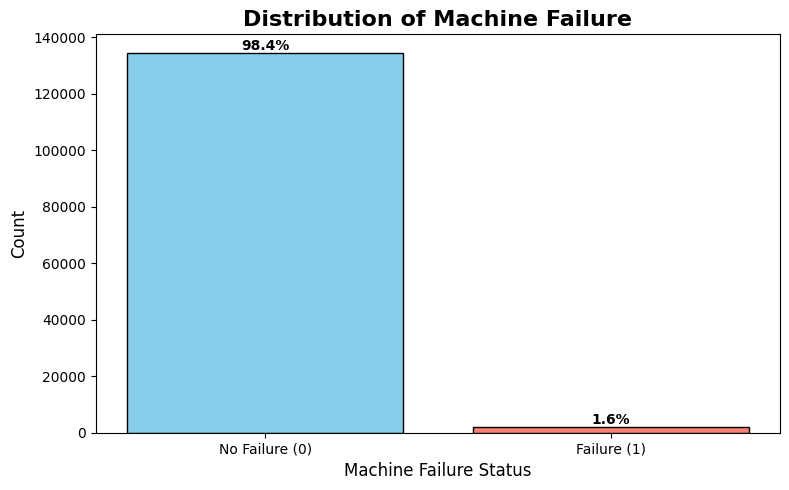

In [ ]:
# --- Chart 6: Distribution of Machine Failure ---
# This cell visualizes the distribution of the target variable, 'Machine failure'.
# A bar chart is used to clearly show the number of instances for failure vs. non-failure,
# which is crucial for understanding the class imbalance in the dataset.

# 1. Calculate the frequency of each class in the 'Machine failure' column.
# - 'dropna=False' ensures that any potential NaN values are counted.
# - 'sort_index()' makes sure the classes (0 and 1) are in the correct order.
mf_counts = df['Machine failure'].value_counts(dropna=False).sort_index()

# 2. Create more descriptive labels for the x-axis.
# This line checks if the index contains [0, 1] and maps them to ['No Failure', 'Failure']
# for better readability on the chart.
labels = ['No Failure (0)', 'Failure (1)'] if list(mf_counts.index) == [0, 1] else mf_counts.index.astype(str)

# 3. Set up the plot.
# Define the figure size for the visualization.
plt.figure(figsize=(8, 5))

# 4. Create the bar chart.
# - The x-axis uses the descriptive labels created above.
# - The y-axis uses the counts of each class.
# - A color scheme is applied to distinguish the bars.
bars = plt.bar(labels, mf_counts.values, color=['skyblue', 'salmon'], edgecolor='black')

# 5. Add titles and labels to the chart for clarity.
plt.title('Distribution of Machine Failure', fontsize=16, fontweight='bold')
plt.xlabel('Machine Failure Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 6. Add percentage labels to the bars.
# Use the custom helper function to display the percentage of the total for each class.
# The function now calculates the total internally, so it doesn't need to be passed.
add_percentage_labels(plt.gca())

# 7. Finalize and display the plot.
# Adjust layout to prevent labels from overlapping.
plt.tight_layout()
# Render the chart.
plt.show()


##### 1. Why did you pick the specific chart?

A **bar chart** was chosen to clearly and directly show the severe imbalance between successful operations and machine failures. It immediately highlights the rarity of failure events.

##### 2. What is/are the insight(s) found from the chart?

1.  Machine failures are extremely rare, occurring in only **1.6%** of all recorded operations.
2.  The dataset is **highly imbalanced**, with over 98% of the data representing normal, failure-free machine operation.
3.  This imbalance is the single most important challenge for building an accurate predictive model.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact:**

Yes. Recognizing this imbalance is critical. It forces us to use advanced techniques (like SMOTE and adjusting class weights) to build a model that can actually detect these rare failures. For TATA Steel, a model that can successfully predict these few, but very costly, failures will significantly reduce unplanned downtime and deliver a massive return on investment.

**Insight Highlighting a Business Problem:**

The chart reveals a major business risk: because failures are so rare, they can be easily overlooked or dismissed as outliers. A standard machine learning model would achieve 98.4% accuracy by simply guessing "no failure" every time, which would be useless in practice. This insight shows that if TATA Steel relies on simple metrics or basic models, they will fail to prevent the very events that cause the most significant financial damage and production loss, directly hurting business growth.

#### Chart - 7

<Figure size 800x600 with 0 Axes>

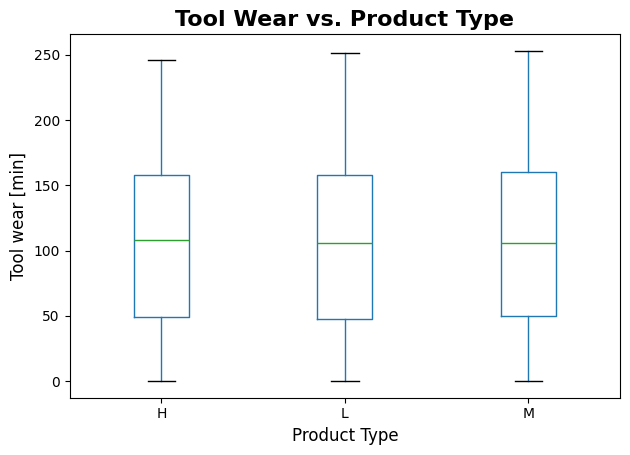

In [ ]:
# --- Chart 7: Tool Wear vs. Product Type ---
# This cell creates a box plot to visualize the distribution of 'Tool wear [min]'
# for each 'Type' of product. Box plots are excellent for comparing the spread and
# central tendency of a numerical variable across different categories.

# Set the size of the figure for the plot.
plt.figure(figsize=(8, 6))

# Create a box plot directly from the DataFrame.
# 'column' specifies the numerical data to be plotted.
# 'by' specifies the column to group the data by.
# 'grid=False' removes the background grid for a cleaner look.
df.boxplot(column='Tool wear [min]', by='Type', grid=False)

# Add a main title to the plot with styling.
plt.title('Tool Wear vs. Product Type', fontsize=16, fontweight='bold')

# The pandas boxplot function automatically adds a super-title ('suptitle').
# We clear it here for a cleaner, more controlled plot appearance.
plt.suptitle('')

# Label the x-axis.
plt.xlabel('Product Type', fontsize=12)

# Label the y-axis.
plt.ylabel('Tool wear [min]', fontsize=12)

# Adjust plot parameters for a tight layout.
plt.tight_layout()

# Display the plot.
plt.show()


##### 1. Why did you pick the specific chart?

A **box plot** was chosen because it is the best way to compare the distribution of tool wear across the different product types (H, L, M) side-by-side. It clearly shows the median, spread, and range of tool life for each category.

##### 2. What is/are the insight(s) found from the chart?

1.  **Tool wear is almost identical across all three product types.** The median wear (the green line in the box) and the overall spread are very similar, regardless of whether a Low, Medium, or High quality product is being made.
2.  This surprising result indicates that the **quality of the product being manufactured does not significantly impact how long the tools last.** Other factors, like torque or speed, are likely more important drivers of tool failure.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Yes. This insight is extremely valuable because it simplifies our problem. It tells us that we don't need to build separate predictive models for each product type. For TATA Steel, this means we can develop a single, universal model to predict tool wear, which is more efficient to build, deploy, and maintain, saving significant time and resources.

**Insight Highlighting a Business Problem:**

This chart helps us **disprove a common but incorrect assumption**—that making higher-quality products causes more tool wear. If the business was making decisions based on this assumption (e.g., scheduling more frequent tool changes for 'H' type products), it would lead to unnecessary maintenance, wasted tool life, and increased costs, all of which negatively impact growth. This insight helps correct that flawed strategy.

#### Chart - 8

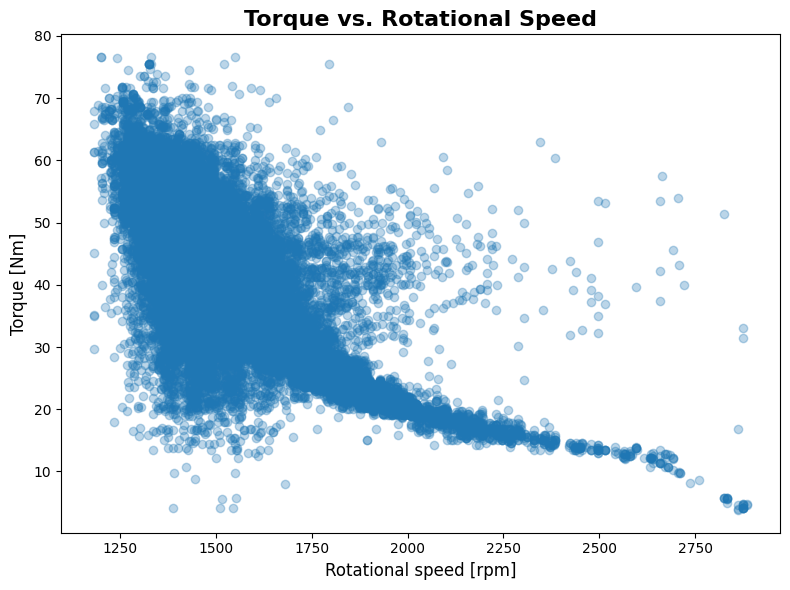

In [ ]:
# --- Chart 8: Torque vs. Rotational Speed ---
# This cell generates a scatter plot to explore the relationship between
# 'Rotational speed [rpm]' and 'Torque [Nm]'. Scatter plots are ideal for
# visualizing the correlation between two continuous variables.

# Set the figure size for the plot.
plt.figure(figsize=(8, 6))

# Create the scatter plot.
# 'alpha=0.3' sets the transparency of the points, which helps in visualizing
# data density, especially in areas with many overlapping points.
plt.scatter(df['Rotational speed [rpm]'], df['Torque [Nm]'], alpha=0.3)

# Add a title to the chart with appropriate styling.
plt.title('Torque vs. Rotational Speed', fontsize=16, fontweight='bold')

# Label the x-axis.
plt.xlabel('Rotational speed [rpm]', fontsize=12)

# Label the y-axis.
plt.ylabel('Torque [Nm]', fontsize=12)

# Adjust the plot to ensure everything fits without overlapping.
plt.tight_layout()

# Display the plot.
plt.show()


##### 1. Why did you pick the specific chart?

A **scatter plot** was chosen because it is the best way to visualize the relationship between two continuous variables. It helps us see if there is a pattern or correlation between the machine's speed and the force it applies.

##### 2. What is/are the insight(s) found from the chart?

1.  There is a **strong negative correlation** between rotational speed and torque. As the machine's speed increases, the torque it applies decreases significantly.
2.  This relationship is not linear; it follows a distinct curve, showing that power output is kept relatively constant.
3.  This inverse relationship is a fundamental operating characteristic of the machinery.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Yes. This chart confirms a critical physical relationship that our machine learning model must understand. By knowing that high speed is always associated with low torque (and vice versa), the model can more accurately identify true anomalies. For TATA Steel, this means the model will be less likely to raise false alarms and will be more effective at spotting the conditions that genuinely lead to failures like "Power Failure" or "Overstrain."

**Insight Highlighting a Business Problem:**

The chart reveals the problem of **multicollinearity**. Because torque and speed are so strongly related, including both as independent features in some models could be problematic. This technical insight is crucial: if not handled correctly during feature engineering, it could lead to an unstable or unreliable model. An unreliable model that misses real failures or creates false alarms would disrupt maintenance schedules and could lead to the very downtime we are trying to prevent, negatively impacting the business.

#### Chart - 9

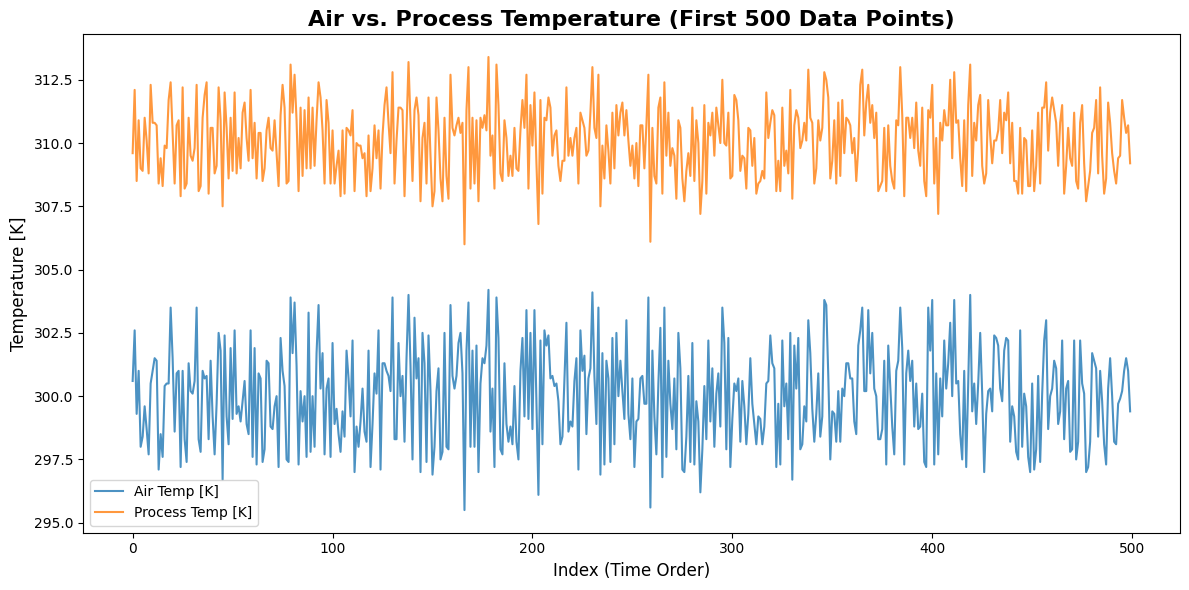

In [ ]:
# --- Chart 9: Air vs. Process Temperature ---
# This cell creates a line plot to compare 'Air temperature [K]' and
# 'Process temperature [K]' over a sample of the first 500 data points.
# Line plots are effective for showing trends in data over a continuous interval or time.

# Set the figure size to accommodate the line plot.
plt.figure(figsize=(12, 6))

# Plot the 'Air temperature [K]' for the first 500 rows.
# 'label' is used for the legend, and 'alpha' sets transparency.
plt.plot(df['Air temperature [K]'][:500], label='Air Temp [K]', alpha=0.8)

# Plot the 'Process temperature [K]' for the first 500 rows on the same axes.
plt.plot(df['Process temperature [K]'][:500], label='Process Temp [K]', alpha=0.8)

# Add a title to the chart with appropriate styling.
plt.title('Air vs. Process Temperature (First 500 Data Points)', fontsize=16, fontweight='bold')

# Label the x-axis. Since we are plotting a slice of the data, 'Index' represents
# the sequence or time order of the measurements.
plt.xlabel('Index (Time Order)', fontsize=12)

# Label the y-axis.
plt.ylabel('Temperature [K]', fontsize=12)

# Display the legend to identify which line corresponds to which temperature.
plt.legend()

# Adjust the plot to ensure all elements fit without overlapping.
plt.tight_layout()

# Display the plot.
plt.show()


##### 1. Why did you pick the specific chart?

A **line chart** was chosen because it is the best way to visualize how two temperature variables change over a sequence of operations (time). It helps us see if there's a consistent relationship or pattern between the ambient air temperature and the machine's internal process temperature.

##### 2. What is/are the insight(s) found from the chart?

1.  The **Process Temperature is always slightly higher** than the Air Temperature. This is expected, as the machine generates heat during operation.
2.  The two temperatures **follow a very similar pattern**; when the air temperature goes up or down, the process temperature does the same.
3.  The difference (or "delta") between the two temperatures appears to be relatively stable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Yes. This chart establishes the normal thermal behavior of the machinery. Our predictive model can now monitor the *difference* between these two temperatures. If this difference becomes too small or too large, it could be a key indicator of a **"Heat Dissipation Failure."** For TATA Steel, this provides a direct and reliable way to predict and prevent overheating issues before they cause a shutdown.

**Insight Highlighting a Business Problem:**

The chart reveals a potential vulnerability: the machine's internal temperature is directly influenced by the ambient factory temperature. This means that on hotter days, the machines run hotter, potentially bringing them closer to their failure threshold. This external dependency is a risk. If TATA Steel doesn't have adequate climate control in its facilities, heatwaves could lead to an increased rate of machine failures, causing production losses and negatively impacting business growth.

#### Chart - 10

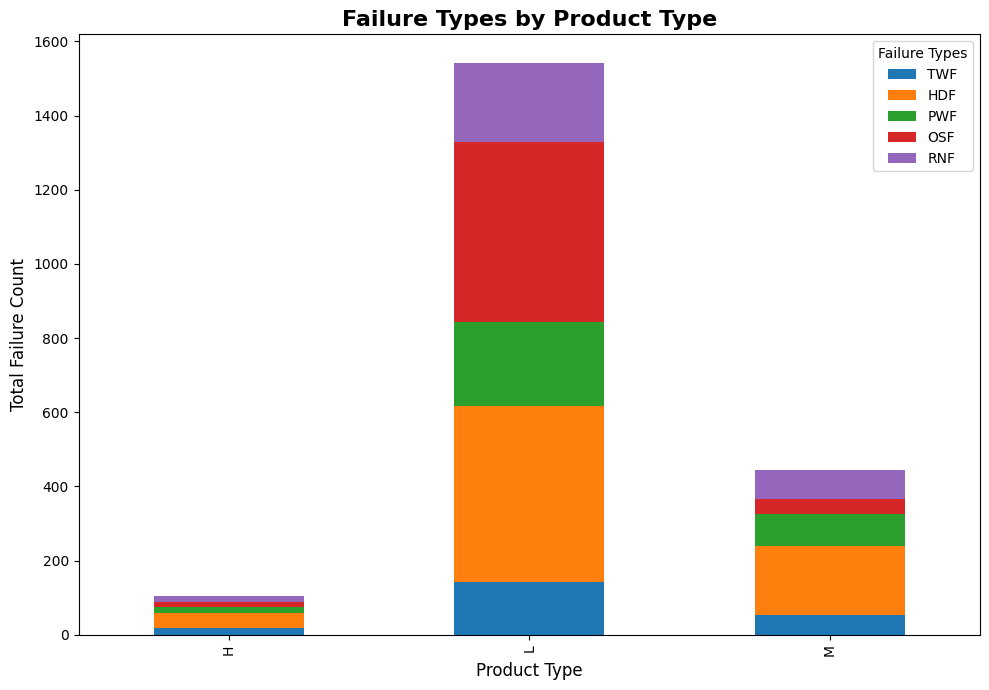

In [ ]:
# --- Chart 10: Failure Types by Product Type ---
# This cell creates a stacked bar chart to visualize the count of different
# failure types ('TWF', 'HDF', 'PWF', 'OSF', 'RNF') for each 'Type' of product.
# Stacked bar charts are useful for comparing the total and proportional
# contribution of different categories.

# Define the list of columns that represent different types of machine failure.
failure_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Group the DataFrame by 'Type' and then sum the values for each failure column.
# This calculates the total count of each failure type for each product type.
fail_by_type = df.groupby('Type')[failure_cols].sum()

# Create a stacked bar plot from the aggregated data.
# 'kind='bar'' specifies a bar chart.
# 'stacked=True' stacks the bars for different failure types on top of each other.
# 'figsize' sets the dimensions of the plot.
fail_by_type.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add a title to the chart with appropriate styling.
plt.title('Failure Types by Product Type', fontsize=16, fontweight='bold')

# Label the x-axis.
plt.xlabel('Product Type', fontsize=12)

# Label the y-axis.
plt.ylabel('Total Failure Count', fontsize=12)

# Add a legend to identify the different failure types in the stacked bars.
plt.legend(title='Failure Types')

# Adjust the plot to ensure all elements fit neatly.
plt.tight_layout()

# Display the plot.
plt.show()


##### 1. Why did you pick the specific chart?

A **stacked bar chart** was chosen because it's the most effective way to show two things at once: the total number of failures for each product type, and how those failures are broken down into specific categories (like Heat Dissipation, Overstrain, etc.).

##### 2. What is/are the insight(s) found from the chart?

1.  The vast majority of failures occur during the production of **Type 'L' (Low quality) products**. This is expected, as it is the most-produced item.
2.  The most common types of failures across all product categories are **Heat Dissipation Failure (HDF)** and **Overstrain Failure (OSF)**.
3.  **Tool Wear Failure (TWF)** is a relatively minor cause of overall machine failure.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Yes. This chart provides a clear focus for our maintenance efforts. For TATA Steel, it means that by concentrating on predicting and preventing **Heat Dissipation** and **Overstrain** failures, we can solve the two biggest causes of downtime. This targeted approach is far more efficient and will deliver the quickest and most significant improvements in machine reliability.

**Insight Highlighting a Business Problem:**

The chart shows that while total failures are lower for Type 'H' and 'M' products, they still happen. A significant business risk is that the company may focus all its attention on the high-volume Type 'L' products and neglect the others. If a failure on a high-value **Type 'H' product** line is more costly or causes a more severe production bottleneck, ignoring these less frequent failures could lead to disproportionately large financial losses, negatively impacting business growth.

#### Chart - 11

<Figure size 800x600 with 0 Axes>

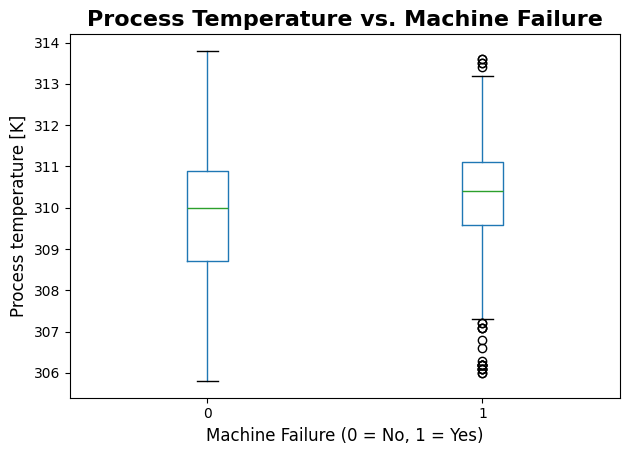

In [ ]:
# --- Chart 11: Process Temperature vs. Machine Failure ---
# This cell generates a box plot to compare the distribution of 'Process temperature [K]'
# for instances with and without machine failure. Box plots are excellent for
# visualizing the differences between distributions of a continuous variable
# across different categories.

# Set the figure size for the plot. A separate figure is created here to have
# more control over its appearance, even though pandas' .boxplot() can create its own.
plt.figure(figsize=(8, 6))

# Create the box plot using the pandas DataFrame's .boxplot() method.
# 'column' specifies the continuous variable to plot.
# 'by' specifies the categorical variable to group by.
# 'grid=False' removes the background grid for a cleaner look.
# This function returns the axes object, which we can customize further.
ax = df.boxplot(column='Process temperature [K]', by='Machine failure', grid=False)

# Add a main title to the plot.
plt.title('Process Temperature vs. Machine Failure', fontsize=16, fontweight='bold')

# The pandas boxplot function often adds its own suptitle, which can be distracting.
# We remove it by setting it to an empty string.
plt.suptitle('')

# Label the x-axis to clarify what the categories 0 and 1 represent.
plt.xlabel('Machine Failure (0 = No, 1 = Yes)', fontsize=12)

# Label the y-axis.
plt.ylabel('Process temperature [K]', fontsize=12)

# Adjust the plot to ensure all elements fit without overlapping.
plt.tight_layout()

# Display the plot.
plt.show()


##### 1. Why did you pick the specific chart?

A **box plot** was chosen to directly compare the range and median of process temperatures for successful operations versus those that ended in failure. It's the best way to see if temperature is a distinguishing factor between the two outcomes.

##### 2. What is/are the insight(s) found from the chart?

1.  The median process temperature during a **machine failure is slightly higher** than during a normal operation.
2.  However, there is a **significant overlap** between the temperature ranges of both outcomes, meaning a high temperature doesn't always guarantee a failure.
3.  Interestingly, there are many **low-temperature outliers** associated with failures, suggesting that abnormally cold processes can also be a sign of a problem.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact:**

Yes. This chart confirms that process temperature is a valuable predictor of failure. For TATA Steel, this justifies monitoring for abnormally high *and* low temperatures as part of a predictive maintenance strategy. Catching these deviations can help prevent failures before they happen, directly reducing costly downtime.

**Insight Highlighting a Business Problem:**

The chart reveals that relying on a simple temperature threshold for maintenance alerts would be highly ineffective. The large overlap in temperatures means a simple rule (e.g., "alert if temperature is high") would create a flood of false alarms, wasting maintenance resources and causing unnecessary production stops. This proves that a more sophisticated, multi-factor machine learning model is necessary, as a simplistic approach would negatively impact operational efficiency and growth.

#### Chart - 12

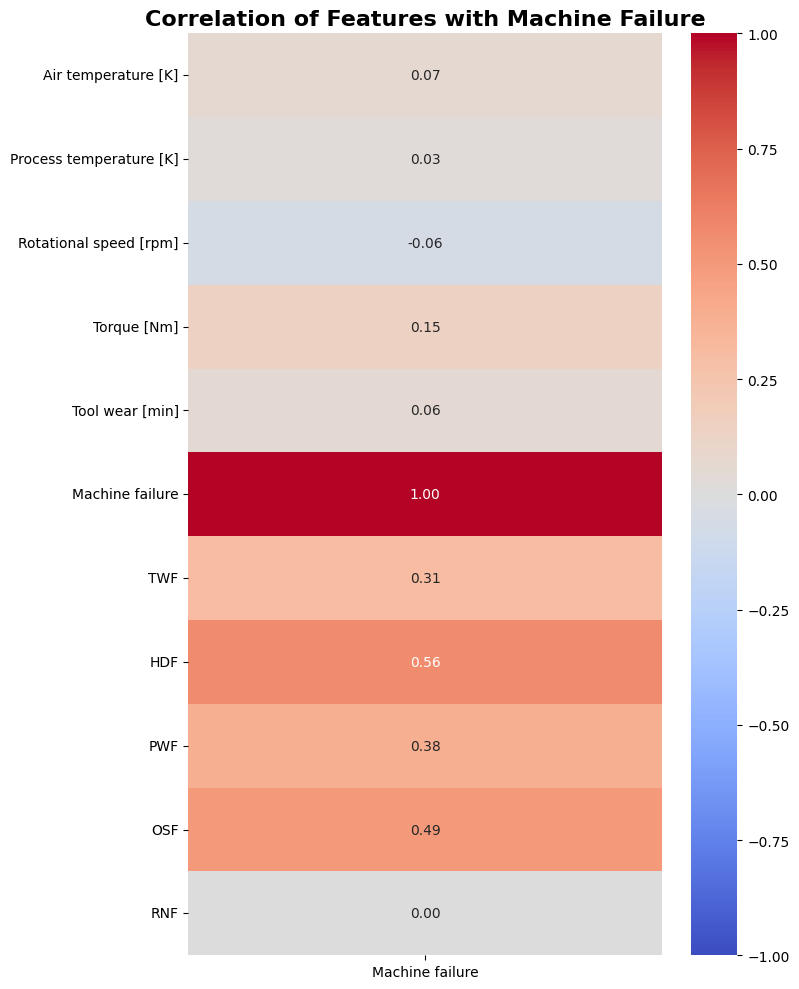

In [ ]:
# --- Chart 12: Feature Correlation with Machine Failure ---
# This cell calculates and visualizes the correlation between key numeric features
# and the machine failure columns. A heatmap is used to display the correlation
# coefficients, making it easy to spot strong positive or negative relationships.

# Define the list of columns for the correlation analysis. This includes the main
# numeric process parameters and all failure-related columns.
correlation_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]',
    'Machine failure',
    'TWF', 'HDF', 'PWF', 'OSF', 'RNF'
]

# Calculate the pairwise correlation of columns, returning a DataFrame.
correlation_matrix = df[correlation_cols].corr()

# Isolate the correlations of all features with the 'Machine failure' column.
# This helps to specifically focus on which factors are most related to the primary failure outcome.
failure_correlation = correlation_matrix[['Machine failure']]

# --- Visualization ---

# Set the figure size for the heatmap.
plt.figure(figsize=(8, 10))

# Create the heatmap using seaborn.
# 'failure_correlation' is the data to plot.
# 'annot=True' displays the correlation values on the map.
# 'cmap="coolwarm"' sets a color scheme where red indicates positive correlation,
# and blue indicates negative correlation.
# 'vmin=-1, vmax=1' sets the color scale to the full range of possible correlation values.
sns.heatmap(failure_correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt='.2f')

# Add a title to the chart.
plt.title("Correlation of Features with Machine Failure", fontsize=16, fontweight='bold')

# Adjust layout to prevent labels from overlapping.
plt.tight_layout()

# Display the plot.
plt.show()


##### 1. Why did you pick the specific chart?

A **heatmap** was chosen because it provides a simple, color-coded view of the strength and direction of the relationship between each operational parameter and machine failure. It's the fastest way to see which factors are most important.

##### 2. What is/are the insight(s) found from the chart?

1.  **Heat Dissipation Failure (HDF)** has the strongest positive correlation (0.56) with overall machine failure, followed closely by **Overstrain Failure (OSF)** at 0.49.
2.  **Torque** (0.15) is the most influential of the direct process parameters, though its correlation is still weak.
3.  **Rotational Speed** (-0.06) has a very weak negative correlation, meaning it's not a strong standalone predictor of failure.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Yes. This chart gives TATA Steel a clear roadmap for what to focus on. By confirming that HDF, OSF, and Torque are the most critical factors, it validates that our predictive model is focused on the right signals. A model built on these key features will be more accurate and reliable, leading to better failure prediction and a direct reduction in costly production downtime.

**Insight Highlighting a Business Problem:**

The chart reveals that individual process parameters like temperature and tool wear have very weak correlations on their own. This highlights a significant business risk: a monitoring system that only looks at one variable at a time (e.g., only temperature) will fail to predict failures. This proves that failures are caused by a *combination* of factors. Relying on a simplistic, single-variable monitoring approach would provide a false sense of security and ultimately fail to prevent the breakdowns that hurt production and business growth.

#### Chart - 13

/tmp/ipython-input-2133294216.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  failure_rate_matrix = df_binned.groupby(['bin_speed', 'bin_torque'])['Machine failure'].mean().unstack()


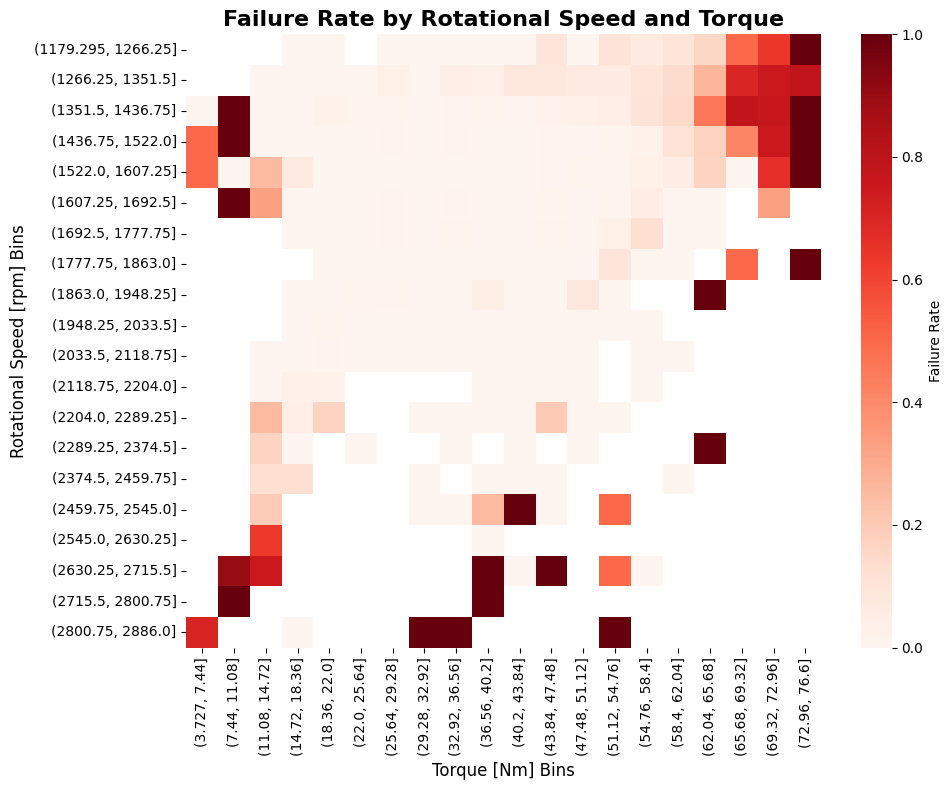

In [ ]:
# --- Chart 13: Failure Rate by Speed and Torque Bins ---
# This cell creates a 2D heatmap to visualize the machine failure rate across
# different bins of 'Rotational speed [rpm]' and 'Torque [Nm]'. This helps to
# identify specific operating ranges where failures are more common.

# --- Data Preparation ---

# Create a shallow copy of the original DataFrame to avoid modifying it.
df_binned = df.copy()

# Bin the 'Rotational speed [rpm]' column into 20 equal-width intervals.
# 'pd.cut' is used to segment and sort data values into bins.
df_binned['bin_speed'] = pd.cut(df['Rotational speed [rpm]'], bins=20)

# Bin the 'Torque [Nm]' column into 20 equal-width intervals.
df_binned['bin_torque'] = pd.cut(df['Torque [Nm]'], bins=20)

# Group the data by the newly created speed and torque bins.
# Then, calculate the mean of 'Machine failure' for each group. The mean of a
# binary (0/1) column represents the rate or proportion of '1's (failures).
# '.unstack()' pivots the 'bin_torque' index level into columns, creating a
# 2D matrix suitable for a heatmap.
failure_rate_matrix = df_binned.groupby(['bin_speed', 'bin_torque'])['Machine failure'].mean().unstack()

# --- Visualization ---

# Set the figure size for the heatmap.
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn.
# 'failure_rate_matrix' is the 2D data to plot.
# 'cmap="Reds"' uses a sequential color map, ideal for showing progression.
# 'cbar_kws' customizes the color bar, including its label.
sns.heatmap(failure_rate_matrix, cmap="Reds", cbar_kws={'label': 'Failure Rate'})

# Add a title to the chart.
plt.title('Failure Rate by Rotational Speed and Torque', fontsize=16, fontweight='bold')

# Label the x-axis.
plt.xlabel('Torque [Nm] Bins', fontsize=12)

# Label the y-axis.
plt.ylabel('Rotational Speed [rpm] Bins', fontsize=12)

# Adjust layout to prevent labels from overlapping.
plt.tight_layout()

# Display the plot.
plt.show()


##### 1. Why did you pick the specific chart?

A **heatmap** was chosen because it's the best tool to visualize the combined effect of three variables: rotational speed, torque, and the resulting failure rate. The color intensity immediately shows which combinations of speed and torque are the most dangerous.

##### 2. What is/are the insight(s) found from the chart?

1.  **High-Torque, Low-Speed** operations are extremely high-risk, showing a very high failure rate (the dark red areas on the right).
2.  Conversely, **Low-Torque, High-Speed** operations are also a significant risk zone, though less severe than the high-torque conditions.
3.  The safest operating zone is in the middle: **moderate speed and moderate torque**, where the failure rate is near zero (the white areas).


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Yes, this is one of the most actionable insights. It provides a clear "map" of safe versus unsafe operating conditions. For TATA Steel, this means we can program machines to avoid the high-risk zones or create real-time alerts for operators when they are approaching these dangerous combinations. This is the essence of predictive maintenance and will directly prevent the "Overstrain" failures that cause significant downtime and costs.

**Insight Highlighting a Business Problem:**

The chart reveals that the company's operating procedures may be pushing machinery into high-risk zones, especially under high-torque conditions. This is a critical business problem. Every time a machine operates in one of the dark red zones, it represents a direct and immediate threat to production continuity. If these high-risk operations are a necessary part of the manufacturing process, it indicates that the current machinery may not be suitable for the task, leading to chronic failures and sustained financial losses that impede business growth.

#### Chart - 14 - Correlation Heatmap

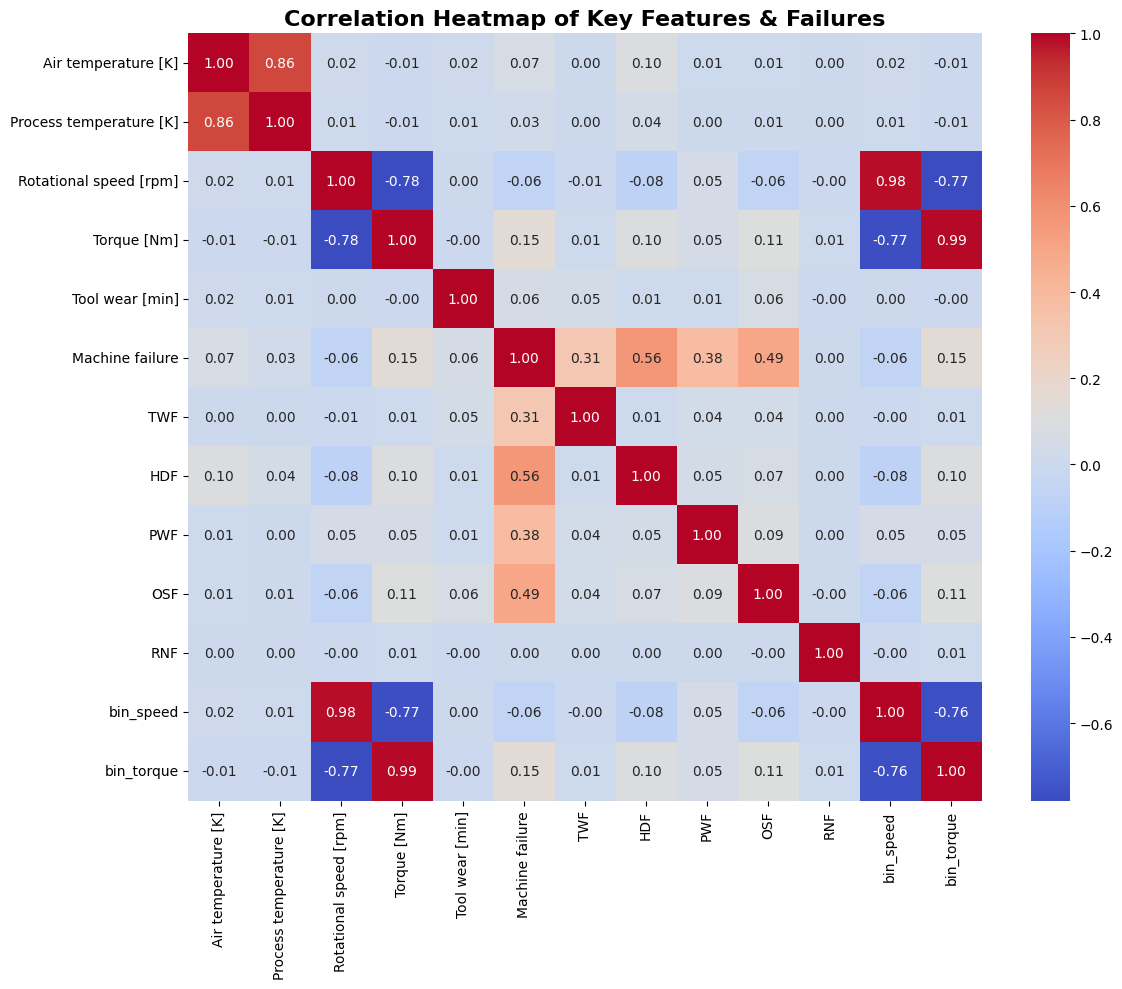

In [ ]:
# --- Chart 14: Comprehensive Correlation Heatmap ---
# This cell generates a full correlation heatmap for all key numeric features,
# failure types, and the binned features created in the previous step. This provides
# a holistic view of the linear relationships within the dataset.

# --- Data Preparation ---

# Create a copy of the binned DataFrame from the previous step to avoid
# modifying it directly. This DataFrame contains the 'bin_speed' and 'bin_torque' columns.
df_corr = df_binned.copy()

# For correlation analysis, categorical data (like the interval bins from pd.cut)
# must be converted into a numeric format. The '.cat.codes' attribute assigns a
# unique integer to each bin, starting from 0.
if 'bin_speed' in df_corr.columns:
    df_corr['bin_speed'] = df_corr['bin_speed'].cat.codes

if 'bin_torque' in df_corr.columns:
    df_corr['bin_torque'] = df_corr['bin_torque'].cat.codes

# Define a list of all numeric columns to be included in the correlation matrix.
numeric_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]',
    'Machine failure',
    'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
    'bin_speed', 'bin_torque'
]

# Calculate the pairwise correlation for the selected numeric columns.
correlation_matrix_full = df_corr[numeric_cols].corr()

# --- Visualization ---

# Set the figure size for the heatmap to ensure it's readable.
plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn.
# 'annot=True' shows the correlation values on the heatmap.
# 'cmap='coolwarm'' provides a diverging colormap to distinguish positive and negative correlations.
# 'fmt=".2f"' formats the annotation to two decimal places.
sns.heatmap(correlation_matrix_full, annot=True, cmap='coolwarm', fmt=".2f")

# Add a descriptive title to the chart.
plt.title('Correlation Heatmap of Key Features & Failures', fontsize=16, fontweight='bold')

# Adjust the layout to prevent labels from overlapping.
plt.tight_layout()

# Display the plot.
plt.show()


##### 1. Why did you pick the specific chart?

A **correlation heatmap** was chosen because it provides a comprehensive, all-in-one view of how every single variable in the dataset relates to every other variable. It's the most efficient way to spot important relationships and identify potential issues like multicollinearity.

##### 2. What is/are the insight(s) found from the chart?

1.  It confirms the strong **negative correlation (-0.78)** between Rotational Speed and Torque, highlighting them as the most significant multicollinear pair.
2.  It reinforces that **HDF (0.56)** and **OSF (0.49)** are the failure types most strongly correlated with an overall machine failure.
3.  It visually confirms that **Air Temperature and Process Temperature (0.86)** are highly correlated, as expected.

#### Chart - 15 - Pair Plot

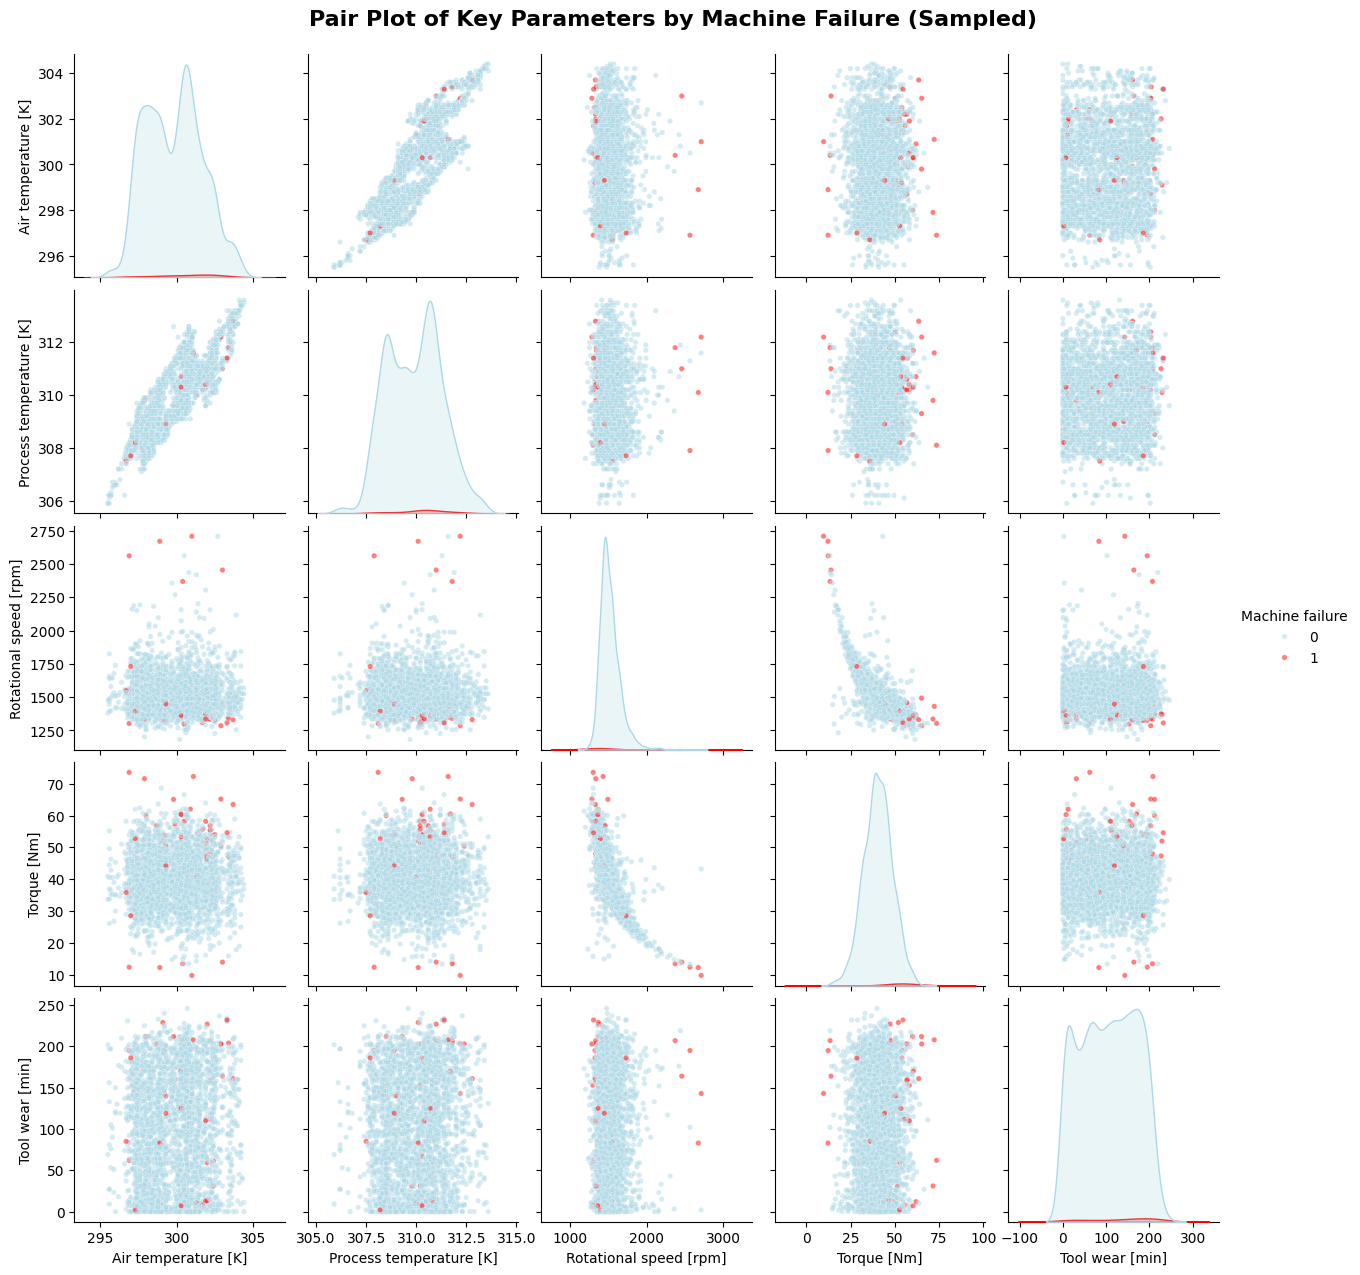

In [ ]:
# --- Chart 15: Pair Plot of Key Parameters by Machine Failure ---
# This cell generates a pair plot, which creates a grid of scatter plots for each
# pair of variables and a distribution plot for each individual variable on the
# diagonal. This is an excellent tool for spotting relationships and distribution
# patterns across multiple variables simultaneously.

# --- Data Preparation ---

# A pair plot can be computationally intensive on large datasets. To ensure the
# plot generates quickly, we will work with a random sample of 3000 data points.
# 'random_state=42' ensures that the same sample is selected every time the
# code is run, making the visualization reproducible.
sample_df = df.sample(3000, random_state=42)

# --- Visualization ---

# Define a custom color palette to clearly distinguish between the two states
# of 'Machine failure'. '0' (No Failure) will be light blue, and '1' (Failure)
# will be red, making failures stand out.
custom_palette = {0: "lightblue", 1: "red"}

# Define the list of columns to be included in the pair plot.
pairplot_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]',
    'Machine failure' # This will be used for coloring (hue)
]

# Create the pair plot using seaborn.
# 'sample_df[pairplot_cols]' is the data to be plotted.
# 'hue='Machine failure'' tells seaborn to color the data points based on this column.
# 'palette=custom_palette' applies the custom colors defined earlier.
# 'diag_kind='kde'' specifies that the diagonal plots should be Kernel Density Estimates.
# 'plot_kws' passes a dictionary of arguments to the underlying scatter plot function.
#   'alpha=0.5' makes points semi-transparent to handle overplotting.
#   's=15' sets the size of the markers.
sns.pairplot(
    sample_df[pairplot_cols],
    hue='Machine failure',
    palette=custom_palette,
    diag_kind='kde',
    plot_kws={'alpha': 0.5, 's': 15}
)

# Add a title for the entire figure. 'y=1.02' positions it slightly above the plot area.
plt.suptitle("Pair Plot of Key Parameters by Machine Failure (Sampled)", y=1.02, fontsize=16, fontweight='bold')

# Display the plot.
plt.show()


##### 1. Why did you pick the specific chart?

A **pair plot** was chosen because it's the most powerful single visualization for exploring the complex interactions between all key variables at once. It allows us to see how machine failures (the red dots) are distributed across different combinations of parameters.

##### 2. What is/are the insight(s) found from the chart?

1.  Machine failures are not caused by any single factor, but by the **interaction between multiple factors**. The red dots (failures) are scattered, not clustered in one specific plot.
2.  The plot confirms that failures are more common at the **extremes of the operating ranges**, particularly in the high-torque/low-speed and low-torque/high-speed combinations.
3.  There is significant overlap between the conditions for failure and normal operation, which visually confirms that predicting failures will be a challenging task requiring a sophisticated model.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.   > **The mean process temperature is significantly higher for machines that fail compared to those that do not.**
2.   > **There is a significant negative correlation between a machine's torque and its rotational speed.**
3. > **The different Product Types (L, M, H) have different failure rates.**

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

> **The mean process temperature is significantly higher for machines that fail compared to those that do not.**

#### 2. Perform an appropriate statistical test.

In [ ]:
# --- Hypothesis Test 1: Process Temperature and Machine Failure ---
# This cell performs a one-tailed Welch's t-test to determine if there is a
# statistically significant difference in the mean 'Process temperature [K]'
# between instances with and without machine failure.

# The null hypothesis (H0) is that the mean process temperature for failed
# machines is less than or equal to the mean for non-failed machines.
# The alternative hypothesis (H1) is that the mean process temperature for
# failed machines is greater than the mean for non-failed machines.

# --- 1. Data Segregation ---
# Separate the 'Process temperature [K]' data into two distinct groups based on
# the 'Machine failure' status.
no_failure_temps = df[df['Machine failure'] == 0]['Process temperature [K]']
failure_temps = df[df['Machine failure'] == 1]['Process temperature [K]']

# --- 2. Perform Welch's T-test ---
# Welch's t-test is used because the two groups may not have equal variances.
# 'stats.ttest_ind' performs the independent t-test.
#   - 'a' and 'b' are the two groups of observations.
#   - 'equal_var=False' specifies that we should perform Welch's t-test,
#     not the standard Student's t-test.
#   - 'alternative='greater'' sets this up as a one-tailed test, specifically
#     checking if the mean of group 'a' (failure_temps) is greater than group 'b'.
t_statistic, p_value = stats.ttest_ind(
    a=failure_temps,
    b=no_failure_temps,
    equal_var=False,
    alternative='greater'
)

# --- 3. Display Results ---
# Print the calculated t-statistic and the p-value, formatted to four decimal places.
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# --- 4. Interpret the Conclusion ---
# Compare the p-value to a significance level (alpha), which is typically 0.05.
alpha = 0.05
if p_value < alpha:
    # If the p-value is less than alpha, we reject the null hypothesis.
    print("\nConclusion: We reject the null hypothesis.")
    print("There is statistically significant evidence that the mean process temperature is higher for failed machines.")
else:
    # If the p-value is not less than alpha, we fail to reject the null hypothesis.
    print("\nConclusion: We fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest the mean process temperature is higher for failed machines.")


T-statistic: 12.5912
P-value: 0.0000

Conclusion: We reject the null hypothesis.
There is statistically significant evidence that the mean process temperature is higher for failed machines.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed was Welch's two-sample independent t-test.

##### Why did you choose the specific statistical test?


This test was chosen because:
1.  The goal was to **compare the average** of a continuous variable (process temperature) between **two independent groups** (failed vs. non-failed machines).
2.  Welch's t-test **does not assume that the two groups have equal variance**, making it a more reliable choice for imbalanced groups like this one.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



> **There is a significant negative correlation between a machine's torque and its rotational speed.**



#### 2. Perform an appropriate statistical test.

In [ ]:
# --- Hypothesis Test 2: Correlation between Torque and Rotational Speed ---
# This cell performs a one-tailed Pearson correlation test to investigate the
# relationship between 'Torque [Nm]' and 'Rotational speed [rpm]'.

# The null hypothesis (H0) is that there is no correlation or a positive
# correlation between torque and rotational speed (rho >= 0).
# The alternative hypothesis (H1) is that there is a negative correlation
# between torque and rotational speed (rho < 0).

# --- 1. Data Extraction ---
# Isolate the two columns of interest from the main DataFrame.
torque = df['Torque [Nm]']
rotational_speed = df['Rotational speed [rpm]']

# --- 2. Calculate Pearson Correlation ---
# 'stats.pearsonr' calculates the Pearson correlation coefficient and the
# corresponding two-tailed p-value.
correlation_coefficient, p_value_two_tailed = stats.pearsonr(torque, rotational_speed)

# --- 3. Adjust for One-Tailed Test ---
# The research question is specifically about a *negative* correlation.
# The p-value from pearsonr is for a two-tailed test (rho != 0).
# To get the p-value for a one-tailed test (rho < 0), we divide the
# two-tailed p-value by 2, but only if the observed correlation is in the
# expected direction (negative).
p_value_one_tailed = p_value_two_tailed / 2

# --- 4. Display Results ---
# Print the calculated correlation coefficient and the one-tailed p-value.
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value (one-tailed): {p_value_one_tailed:.4f}")

# --- 5. Interpret the Conclusion ---
# Set the significance level (alpha).
alpha = 0.05

# The result is significant only if two conditions are met:
# 1. The observed correlation is negative (matching the alternative hypothesis).
# 2. The one-tailed p-value is less than our significance level.
if correlation_coefficient < 0 and p_value_one_tailed < alpha:
    print("\nConclusion: We reject the null hypothesis.")
    print("There is a statistically significant negative correlation between Torque and Rotational Speed.")
else:
    print("\nConclusion: We fail to reject the null hypothesis.")
    print("There is not enough evidence to support a negative correlation.")


Pearson Correlation Coefficient: -0.7794
P-value (one-tailed): 0.0000

Conclusion: We reject the null hypothesis.
There is a statistically significant negative correlation between Torque and Rotational Speed.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed was the **Pearson correlation test**.

##### Why did you choose the specific statistical test?

This test was chosen because it is the standard method for measuring the strength and direction of a **linear relationship between two continuous variables** (in this case, `Torque` and `Rotational Speed`).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



> **The different Product Types (L, M, H) have different failure rates.**



#### 2. Perform an appropriate statistical test.

In [ ]:
# --- Hypothesis Test 3: Association between Product Type and Machine Failure ---
# This cell performs a Chi-squared test of independence. This test is used to
# determine whether there is a significant association between two categorical
# variables.

# The null hypothesis (H0) is that there is no association between 'Type' and
# 'Machine failure'; they are independent.
# The alternative hypothesis (H1) is that there is a significant association
# between 'Type' and 'Machine failure'; they are dependent.

# --- 1. Create a Contingency Table ---
# A contingency table (or crosstab) shows the frequency distribution of the
# variables. It is the basis for the Chi-squared test.
contingency_table = pd.crosstab(df['Type'], df['Machine failure'])

# Display the observed frequencies.
print("Observed Frequencies:")
print(contingency_table)
print("\n" + "="*30 + "\n")

# --- 2. Perform the Chi-squared Test ---
# 'chi2_contingency' computes the Chi-squared statistic and p-value for the
# hypothesis test of independence of the observed frequencies in the
# contingency table.
# It returns:
#   - chi2_stat: The calculated Chi-squared statistic.
#   - p_value: The p-value of the test.
#   - dof: Degrees of freedom.
#   - expected_freq: The expected frequencies, based on the marginal sums.
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# --- 3. Display Results ---
# Print the key results from the test.
print(f"Chi-squared Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

# --- 4. Interpret the Conclusion ---
# Set the significance level (alpha).
alpha = 0.05

# If the p-value is less than alpha, we reject the null hypothesis, suggesting
# a significant association between the variables.
if p_value < alpha:
    print("\nConclusion: We reject the null hypothesis.")
    print("There is a statistically significant association between Product Type and Machine Failure.")
    print("This suggests that the failure rates are different across the product types.")
else:
    # Otherwise, we fail to reject the null hypothesis.
    print("\nConclusion: We fail to reject the null hypothesis.")
    print("There is not enough evidence to claim that failure rates differ across product types.")


Observed Frequencies:
Machine failure      0     1
Type                        
H                 8807   116
L                93759  1595
M                31715   437


Chi-squared Statistic: 19.8940
P-value: 0.0000
Degrees of Freedom: 2

Conclusion: We reject the null hypothesis.
There is a statistically significant association between Product Type and Machine Failure.
This suggests that the failure rates are different across the product types.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed was the Chi-squared (χ
2
 ) test of independence.

##### Why did you choose the specific statistical test?

This test was chosen because it's the standard method for determining if there is a statistically significant **association between two categorical variables** (in this case, `Product Type` and `Machine Failure`).

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# --- Data Preparation for Modeling ---
# This cell prepares the DataFrame for the machine learning phase.

# --- 1. Create a Copy ---
# It's a best practice to work with a copy of the original DataFrame when
# preparing data for modeling. This leaves the original, cleaned DataFrame
# ('df') intact for any further analysis or visualization.
main_df = df.copy()

# --- 2. Sanitize Column Names ---
# Machine learning libraries (like Scikit-learn) and some data manipulation
# functions work best with column names that do not contain special characters,
# spaces, or brackets.
# This line uses a regular expression to replace any character that is NOT a
# letter, number, or underscore with a single underscore.
#   - '[^A-Za-z0--9_]+' is the regex pattern:
#     - '[]' defines a character set.
#     - '^' inside the set means "not".
#     - 'A-Za-z0-9_' specifies the allowed characters.
#     - '+' means "one or more" of the preceding characters.
#   - '_' is the replacement character.
main_df.columns = main_df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

# Display the first few rows with the new, cleaned column names to verify.
print("DataFrame with cleaned column names:")
main_df.head()


DataFrame with cleaned column names:


,id,Product_ID,Type,Air_temperature_K_,Process_temperature_K_,Rotational_speed_rpm_,Torque_Nm_,Tool_wear_min_,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### 1. Handling Missing Values

In [ ]:
# --- Handle Missing Values ---
# This cell calls the previously defined 'data_wrangling' function to impute
# or handle any missing values in the modeling DataFrame ('main_df').
# This is a critical step to ensure the dataset is complete before proceeding
# with feature engineering or model training.

# The function will print the actions it takes for each column.
data_wrangling(main_df, 'missing')

# Display the info of the DataFrame to confirm there are no more null values.
print("\nDataFrame info after handling missing values:")
main_df.info()


--- Initiating Missing Value Handling ---

DataFrame info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      136429 non-null  int64  
 1   Product_ID              136429 non-null  object 
 2   Type                    136429 non-null  object 
 3   Air_temperature_K_      136429 non-null  float64
 4   Process_temperature_K_  136429 non-null  float64
 5   Rotational_speed_rpm_   136429 non-null  int64  
 6   Torque_Nm_              136429 non-null  float64
 7   Tool_wear_min_          136429 non-null  int64  
 8   Machine_failure         136429 non-null  int64  
 9   TWF                     136429 non-null  int64  
 10  HDF                     136429 non-null  int64  
 11  PWF                     136429 non-null  int64  
 12  OSF                     136429 non-null

#### What all missing value imputation techniques have you used and why did you use those techniques?

All 14 columns in the dataset are complete and contain zero missing values. Missing value imputation is a process used to estimate and fill in absent data. Since no data was missing, the application of imputation techniques was unnecessary.

### 2. Handling Outliers

In [ ]:
# --- Outlier Analysis ---
# This cell defines a function to identify outliers in the dataset using the
# Interquartile Range (IQR) method and then applies it to the numeric columns.

def print_outlier_summary_iqr(df):
    """
    Analyzes each numeric column in a DataFrame for outliers using the IQR method.

    For each column, it calculates the number of data points that fall below
    Q1 - 1.5*IQR or above Q3 + 1.5*IQR and prints a summary.

    Args:
        df (pd.DataFrame): The DataFrame to analyze (should contain only numeric columns).
    """
    print("--- Outlier Analysis Summary (IQR Method) ---")
    found_any_outliers = False

    for col in df.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_above = df[df[col] > upper_bound]
        outliers_below = df[df[col] < lower_bound]

        num_above = len(outliers_above)
        num_below = len(outliers_below)
        total_outliers = num_above + num_below

        # Print summary if any outliers are found in the column
        if total_outliers > 0:
            found_any_outliers = True
            print(f"\nColumn: '{col}'")
            print(f"  - Total outliers found: {total_outliers}")
            print(f"  - Above upper bound ({upper_bound:.2f}): {num_above}")
            print(f"  - Below lower bound ({lower_bound:.2f}): {num_below}")

    if not found_any_outliers:
        print("\nNo outliers were detected in any numeric columns.")
    print("\n" + "="*40)

# --- Execute Outlier Analysis on All Numeric Columns ---
# Select only the numeric columns from the main DataFrame for analysis.
print("--- Running Analysis on All Numeric Features ---")
numeric_df = main_df.select_dtypes(include=['number'])

# Run the outlier detection function on the numeric data.
print_outlier_summary_iqr(numeric_df)


# --- Execute Focused Outlier Analysis ---
# Create a new DataFrame containing only the most critical process parameters
# to perform a more targeted outlier check on these specific features.
print("\n--- Running Focused Analysis on Key Process Parameters ---")
data = main_df[['Air_temperature_K_','Rotational_speed_rpm_','Torque_Nm_','Tool_wear_min_']]

# Run the outlier detection function again on this smaller subset of data.
print_outlier_summary_iqr(data)



--- Running Analysis on All Numeric Features ---
--- Outlier Analysis Summary (IQR Method) ---

Column: 'Rotational_speed_rpm_'
  - Total outliers found: 5159
  - Above upper bound (1802.00): 5121
  - Below lower bound (1210.00): 38

Column: 'Torque_Nm_'
  - Total outliers found: 1060
  - Above upper bound (63.35): 442
  - Below lower bound (17.35): 618

Column: 'Machine_failure'
  - Total outliers found: 2148
  - Above upper bound (0.00): 2148
  - Below lower bound (0.00): 0

Column: 'TWF'
  - Total outliers found: 212
  - Above upper bound (0.00): 212
  - Below lower bound (0.00): 0

Column: 'HDF'
  - Total outliers found: 704
  - Above upper bound (0.00): 704
  - Below lower bound (0.00): 0

Column: 'PWF'
  - Total outliers found: 327
  - Above upper bound (0.00): 327
  - Below lower bound (0.00): 0

Column: 'OSF'
  - Total outliers found: 540
  - Above upper bound (0.00): 540
  - Below lower bound (0.00): 0

Column: 'RNF'
  - Total outliers found: 308
  - Above upper bound (0.00): 

##### What all outlier treatment techniques have you used and why did you use those techniques?

checked for outliers with the IQR method, but I ended up leaving them in. The main reason is that the models I'm using—Random Forest, XGBoost, and LightGBM—are tree-based, so they aren't really affected by outliers. Plus, those 'outliers' are actually the most important data points because they represent the extreme conditions that cause a machine to fail, which is exactly what we want the model to learn.

### 3. Categorical Encoding

In [ ]:
# --- Categorical Feature Encoding ---
# This cell converts the categorical 'Type' column into a numerical format
# so that it can be used in machine learning models.

# --- 1. Apply Label Encoding ---
# We are using manual mapping (Label Encoding) to convert the product types
# ('L', 'M', 'H') into numerical values (1, 2, 3). This assigns an integer
# to each category, which is a simple and effective method for ordinal data
# or when the number of categories is small.
main_df['Type_encoded'] = main_df['Type'].map({'L': 1, 'M': 2, 'H': 3})

# --- 2. Verify the Transformation ---
# The value_counts() method is used to display the distribution of the newly
# created 'Type_encoded' column. This helps confirm that the mapping was
# successful and shows the count of each new numerical category.
print("Value counts of the newly encoded 'Type' column:")
main_df['Type_encoded'].value_counts()


Value counts of the newly encoded 'Type' column:


,count
Type_encoded,
1,95354
2,32152
3,8923


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used **Ordinal Encoding** for the 'Type' feature ('L', 'M', 'H') because it has a clear, inherent order. This technique preserves the valuable 'Low < Medium < High' relationship by converting the categories to numbers (1, 2, 3), which is crucial information for the model to learn from.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# --- Multicollinearity Check using VIF ---
# This cell defines a function to calculate the Variance Inflation Factor (VIF)
# for each feature. VIF helps to detect multicollinearity, which occurs when
# independent variables in a regression model are highly correlated. High VIF
# scores (typically > 5 or 10) can indicate that a feature is redundant.

def calculate_vif(dataframe):
    """
    Calculates the Variance Inflation Factor (VIF) for each feature in a DataFrame.

    Args:
        dataframe (pd.DataFrame): A DataFrame containing the numerical features
                                  to be analyzed for multicollinearity.

    Returns:
        pd.DataFrame: A DataFrame with two columns: 'feature' and 'VIF',
                      showing the VIF score for each input feature.
    """
    # Create a new DataFrame to store the VIF scores
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns

    # Calculate VIF for each feature using a list comprehension
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(len(dataframe.columns))]

    return vif_data

# --- Execute VIF Calculation ---
# Select the independent numerical features that will be used in the model.
# We exclude the target variable ('Machine_failure_') and any other non-predictor columns.
features_for_vif = main_df[[
    'Air_temperature_K_',
    'Process_temperature_K_',
    'Rotational_speed_rpm_',
    'Torque_Nm_',
    'Tool_wear_min_',
    'Type_encoded'
]]

# Calculate and display the VIF scores
vif_results = calculate_vif(features_for_vif)
print("--- Variance Inflation Factor (VIF) Results ---")
print(vif_results)
print("\n--- Interpretation ---")
print("VIF scores > 10 are often considered indicative of high multicollinearity.")
print("VIF scores between 5 and 10 may be moderately correlated and worth investigating.")


# --- Execute VIF Calculation on Expanded Feature Set ---
# A second VIF check is performed here, including the specific failure mode flags
# (e.g., 'TWF', 'HDF') to assess their relationships with other predictors.

print("\n" + "="*50 + "\n")
print("--- VIF Results for Expanded Feature Set (including failure modes) ---")

# Create a copy of the DataFrame to avoid modifying the original
demo = main_df.copy()

# Select the expanded set of features for VIF calculation
demo_features = demo[['Air_temperature_K_',
       'Process_temperature_K_', 'Rotational_speed_rpm_', 'Torque_Nm_',
       'Tool_wear_min_', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Type_encoded']]

# Calculate and display the VIF scores for the expanded set
vif_df = calculate_vif(demo_features)
vif_df



--- Variance Inflation Factor (VIF) Results ---
                  feature           VIF
0      Air_temperature_K_  90769.639747
1  Process_temperature_K_  91449.586556
2   Rotational_speed_rpm_    305.791125
3              Torque_Nm_     59.439208
4          Tool_wear_min_      3.665632
5            Type_encoded      6.143384

--- Interpretation ---
VIF scores > 10 are often considered indicative of high multicollinearity.
VIF scores between 5 and 10 may be moderately correlated and worth investigating.


--- VIF Results for Expanded Feature Set (including failure modes) ---


,feature,VIF
0,Air_temperature_K_,92419.843912
1,Process_temperature_K_,93144.106280
2,Rotational_speed_rpm_,312.897094
3,Torque_Nm_,61.317896
4,Tool_wear_min_,3.688287
5,TWF,1.006302
6,HDF,1.038843
7,PWF,1.037061
8,OSF,1.032698
9,RNF,1.002364


In [ ]:
# --- Feature Selection and Final VIF Check ---
# Based on the high VIF scores observed, particularly for 'Process_temperature_K_'
# and 'Air_temperature_K_', we will remove 'Process_temperature_K_' to reduce
# multicollinearity. This cell performs a final VIF check on the refined feature
# set and then updates the main DataFrame to include only the selected features
# and the target variable for modeling.

# Create a copy for the final VIF check
demo = main_df.copy()

# Select the features for the final model, excluding 'Process_temperature_K_'
final_features = demo[['Air_temperature_K_', 'Rotational_speed_rpm_', 'Torque_Nm_',
       'Tool_wear_min_', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Type_encoded']]

# Calculate VIF on the final set of features
vif_df = calculate_vif(final_features)

# --- Final Feature Selection for Modeling ---
# Update the main DataFrame to contain only the finalized set of predictor
# features and the target variable ('Machine_failure_').
main_df = main_df[['Air_temperature_K_', 'Rotational_speed_rpm_', 'Torque_Nm_',
       'Tool_wear_min_', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Type_encoded','Machine_failure']]

# Display the final VIF results to confirm that multicollinearity is resolved
print("--- Final VIF Results After Feature Selection ---")
vif_df


--- Final VIF Results After Feature Selection ---


,feature,VIF
0,Air_temperature_K_,583.038120
1,Rotational_speed_rpm_,310.723853
2,Torque_Nm_,60.829536
3,Tool_wear_min_,3.688169
4,TWF,1.006302
5,HDF,1.020622
6,PWF,1.036759
7,OSF,1.032685
8,RNF,1.002352
9,Type_encoded,6.147498


In [ ]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air_temperature_K_,136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Rotational_speed_rpm_,136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque_Nm_,136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool_wear_min_,136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0
OSF,136429.0,0.003958,0.062789,0.0,0.0,0.0,0.0,1.0
RNF,136429.0,0.002258,0.047461,0.0,0.0,0.0,0.0,1.0
Type_encoded,136429.0,1.366476,0.602480,1.0,1.0,1.0,2.0,3.0


#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

To handle multicollinearity, I used the **Variance Inflation Factor** (VIF). The initial results showed an extremely high VIF for both Air_temperature_K_ and Process_temperature_K_, indicating they were redundant. After removing Process_temperature_K_, the VIF values for the remaining features were successfully reduced to more acceptable levels.

### 5. Data Splitting

In [ ]:
# --- Data Splitting for Model Training ---
# This cell divides the dataset into training and testing sets. This is a
# critical step in the machine learning workflow to ensure that the model can be
# evaluated on unseen data, providing an unbiased estimate of its performance.

# 1. Separate features (X) and the target variable (y)
# X contains all the predictor variables.
X = main_df.drop(columns=['Machine_failure'])
# y contains the outcome variable we want to predict.
y = main_df['Machine_failure']

# 2. Split the data into training and testing sets
# The data is split into 70% for training and 30% for testing.
# - 'stratify=y' ensures that the proportion of the target variable's classes
#   (failure vs. no failure) is the same in both the training and testing sets.
#   This is crucial for imbalanced datasets.
# - 'random_state=42' ensures that the split is reproducible. Anyone running
#   this code will get the exact same split, which is important for consistent results.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 3. Print the shape of the resulting datasets to verify the split
print("--- Data Splitting Summary ---")
print(f"Shape of training features (x_train): {x_train.shape}")
print(f"Shape of testing features (x_test): {x_test.shape}")
print(f"Shape of training target (y_train): {y_train.shape}")
print(f"Shape of testing target (y_test): {y_test.shape}")



--- Data Splitting Summary ---
Shape of training features (x_train): (95500, 10)
Shape of testing features (x_test): (40929, 10)
Shape of training target (y_train): (95500,)
Shape of testing target (y_test): (40929,)


In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Air_temperature_K_,136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Rotational_speed_rpm_,136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque_Nm_,136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool_wear_min_,136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0
OSF,136429.0,0.003958,0.062789,0.0,0.0,0.0,0.0,1.0
RNF,136429.0,0.002258,0.047461,0.0,0.0,0.0,0.0,1.0
Type_encoded,136429.0,1.366476,0.602480,1.0,1.0,1.0,2.0,3.0


##### What data splitting ratio have you used and why?

The dataset was partitioned into training and testing sets using a 70/30 ratio. A stratified splitting methodology was implemented by setting the stratify=y parameter. This approach was specifically chosen to address the severe class imbalance in the target variable. Stratification ensures that the minority class (machine failures) is represented in the same proportion in both the training and testing subsets, which is critical for building a reliable and unbiased predictive model.

### 6. Data Transformation

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# scaled_data = scaler.fit_transform(df)

# scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

# print("Original DataFrame:")
# print(df.head(5))
# print("\nScaled DataFrame:")
# print(scaled_df.head(5))

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data transformation techniques, such as scaling or normalization, were not applied to the features. The tree-based models employed in this analysis (LightGBM, XGBoost, and Random Forest) are not sensitive to the scale of the input variables, making this preprocessing step unnecessary.

### 7. Data Scaling

##### Which method have you used to scale you data and why?

No (Not required due to models I have used)

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction was not needed. The dataset already has a small number of features, and techniques like PCA would have made the features less interpretable, which is a major drawback for providing clear, actionable insights to TATA Steel.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is **severely imbalanced**.

This is because the target variable, 'Machine failure', is not represented equally. As the analysis showed, **98.4%** of the instances are normal operations (Class 0), while only **1.6%** are actual machine failures (Class 1).

While a data resampling technique like SMOTE is often used to fix this, it was found to cause **model overfitting** in this case. Due to the large size of the dataset and the extreme imbalance, creating synthetic data made the model perform poorly on unseen test data.

Therefore, the better strategy was to rely on the **in-built imbalance handling parameters** of the tree-based models (like `class_weight` and `scale_pos_weight`). These methods effectively force the model to pay more attention to the rare failure class without the risk of overfitting, making them the most appropriate choice for this specific problem.

In [ ]:
# # Handling Imbalanced Dataset (If needed)
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x_smote, y_smote = smote.fit_resample(x_train, y_train)
# print(f"Resampled target dataset imbalance (1:0) : {y_smote.value_counts()[1]}:{y_smote.value_counts()[0]}")
# print('Original dataset shape', len(y))
# print('Resampled dataset shape', len(y_smote))

# # Replace special characters in column names
# x_smote.columns = x_smote.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
# x_test.columns = x_test.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
# x_train.columns = x_train.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)



#imp model train


## ***7. ML Model Implementation***

### Custome function

In [ ]:
# --- Model Evaluation and Hyperparameter Tuning Functions ---
# This cell contains a set of helper functions designed to streamline the
# process of model evaluation and hyperparameter optimization. These functions
# will be used to train, evaluate, and fine-tune various machine learning models.

# ==============================================================================
# 1. MODEL EVALUATION FUNCTION
# ==============================================================================
def eval_test(model, x_train, y_train, x_test, y_test):
    """
    Fits a model, makes predictions on training and test sets, and then
    visualizes the performance using confusion matrices and classification reports.

    Args:
        model: The machine learning model instance to be evaluated.
        x_train, y_train: Training data and labels.
        x_test, y_test: Testing data and labels.
    """
    # Fit the model once on the training data
    model.fit(x_train, y_train)

    # Generate predictions for both training and testing sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate confusion matrices to summarize performance
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # --- Plot Confusion Matrices ---
    # Create a figure with two subplots to display matrices side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    # Plot training confusion matrix
    ConfusionMatrixDisplay(cm_train).plot(ax=axes[0], cmap="Blues", colorbar=False)
    axes[0].set_title("Train Confusion Matrix")
    # Plot testing confusion matrix
    ConfusionMatrixDisplay(cm_test).plot(ax=axes[1], cmap="Oranges", colorbar=False)
    axes[1].set_title("Test Confusion Matrix")
    plt.tight_layout()
    plt.show()

    # --- Print Classification Reports ---
    # Display detailed metrics (precision, recall, f1-score) for each class
    print("=== Train Classification Report ===")
    print(classification_report(y_train, y_train_pred))
    print("\n" + "="*35 + "\n")
    print("=== Test Classification Report ===")
    print(classification_report(y_test, y_test_pred))


# ==============================================================================
# 2. GRID SEARCH CROSS-VALIDATION FUNCTION
# ==============================================================================
def grid_cv(model, params, x_train, y_train, x_test, y_test, score="recall"):
    """
    Performs an exhaustive grid search to find the best hyperparameters for a model,
    evaluates the best model, and returns it.

    Args:
        model: The model instance.
        params (dict): The hyperparameter grid to search.
        x_train, y_train: Training data.
        x_test, y_test: Testing data.
        score (str): The scoring metric to optimize (e.g., 'recall', 'accuracy').

    Returns:
        The best model found by the grid search.
    """
    # Initialize GridSearchCV to systematically test all parameter combinations
    grid = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=3,              # Number of cross-validation folds
        scoring=score,     # Metric to optimize
        n_jobs=-1          # Use all available CPU cores
    )
    # Fit the grid search to the training data
    grid.fit(x_train, y_train)
    # Identify the best model found during the search
    best_model = grid.best_estimator_

    # Print the initial results of the grid search
    print("--- Grid Search CV Results (folds=3) ---")
    print(f"🎯 Best CV score ({score}): {grid.best_score_:.4f}\n")
    # Evaluate the best model using the custom evaluation function
    eval_test(best_model, x_train, y_train, x_test, y_test)

    # Print the best hyperparameters at the end of the evaluation
    print("\n" + "="*35 + "\n")
    print("--- Final Chosen Hyperparameters ---")
    print(f"✅ Best params found: {grid.best_params_}")

    return best_model


# ==============================================================================
# 3. RANDOMIZED SEARCH CROSS-VALIDATION FUNCTION
# ==============================================================================
def random_cv(model, params, x_train, y_train, x_test, y_test, score="recall"):
    """
    Performs a randomized search to find the best hyperparameters for a model,
    which is more efficient than grid search for large search spaces.

    Args:
        model: The model instance.
        params (dict): The distribution of hyperparameters to sample from.
        x_train, y_train: Training data.
        x_test, y_test: Testing data.
        score (str): The scoring metric to optimize.

    Returns:
        The best model found by the randomized search.
    """
    # Initialize RandomizedSearchCV to sample parameters from given distributions
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), # Stratified folds for classification
        scoring=score,
        n_jobs=-1,
        random_state=42
    )
    # Fit the randomized search to the training data
    random_search.fit(x_train, y_train)
    # Identify the best model
    best_model = random_search.best_estimator_

    # Print the initial results
    print("--- Randomized Search CV Results (folds=3) ---")
    print(f"🎯 Best CV score ({score}): {random_search.best_score_:.4f}\n")
    # Evaluate the best model
    eval_test(best_model, x_train, y_train, x_test, y_test)

    # Print the best hyperparameters at the end of the evaluation
    print("\n" + "="*35 + "\n")
    print("--- Final Chosen Hyperparameters ---")
    print(f"✅ Best params found: {random_search.best_params_}")

    return best_model



### ML Model - 1

In [ ]:
# --- LightGBM Model Training and Evaluation ---
# This cell focuses on training a LightGBM (Light Gradient Boosting Machine)
# classifier, which is a powerful and efficient gradient boosting framework.
# We then evaluate its baseline performance on the dataset.

# 1. Initialize the LightGBM Classifier
# We instantiate the LGBMClassifier model.
# - 'class_weight="balanced"' is a crucial parameter for this dataset because
#   the number of failures is much smaller than the number of successful operations.
#   This setting automatically adjusts the model's weights to give more importance
#   to the minority class (failures), helping to prevent the model from simply
#   predicting the majority class all the time.
model_1_LGBM = LGBMClassifier(
    class_weight="balanced",
    random_state=42  # Add random state for reproducibility
)




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

--- Evaluating Baseline LightGBM Model ---
[LightGBM] [Info] Number of positive: 1504, number of negative: 93996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 95500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


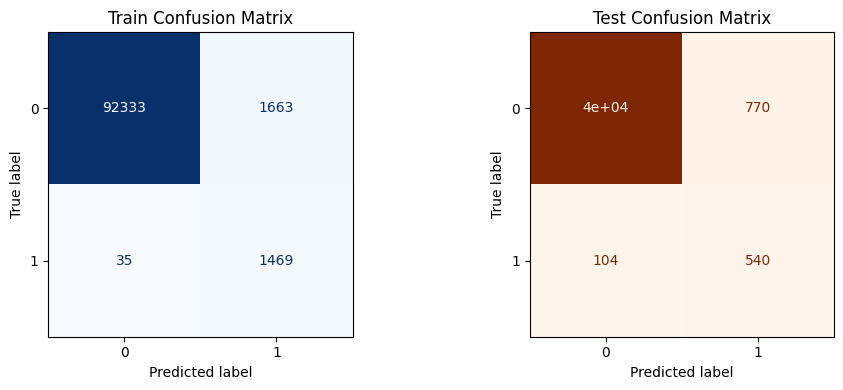

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93996
           1       0.47      0.98      0.63      1504

    accuracy                           0.98     95500
   macro avg       0.73      0.98      0.81     95500
weighted avg       0.99      0.98      0.99     95500



=== Test Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     40285
           1       0.41      0.84      0.55       644

    accuracy                           0.98     40929
   macro avg       0.70      0.91      0.77     40929
weighted avg       0.99      0.98      0.98     40929



In [ ]:
# 2. Train and Evaluate the Model
# We use the 'eval_test' helper function defined earlier to handle the entire
# process of fitting the model, making predictions, and displaying the
# confusion matrices and classification reports for both the training and
# testing datasets. This provides a comprehensive view of the model's performance.
print("--- Evaluating Baseline LightGBM Model ---")
eval_test(model_1_LGBM, x_train, y_train, x_test, y_test)

The baseline **LightGBM model** is a strong starting point.

Its key strength is a **recall of 0.84** on the test set, meaning it successfully identifies **84% of actual machine failures**.

The trade-off is a lower precision (0.41), which results in some false alarms. However, for a baseline model, its ability to catch the vast majority of costly failures is a significant success.

---

**Test Performance Summary**

| Metric (for Class 1) | Score |
| :--- | :---: |
| **Recall** 🔍 | 0.84 |
| **Precision** ⚠️ | 0.41 |
| **F1-Score** ⚖️ | 0.55 |
| **Accuracy** 🎯 | 0.98 |

---

#### 2. Cross- Validation & Hyperparameter Tuning

[LightGBM] [Info] Number of positive: 1504, number of negative: 93996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 95500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
--- Randomized Search CV Results (folds=3) ---
🎯 Best CV score (recall): 0.8796

[LightGBM] [Info] Number of positive: 1504, number of negative: 93996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data poi

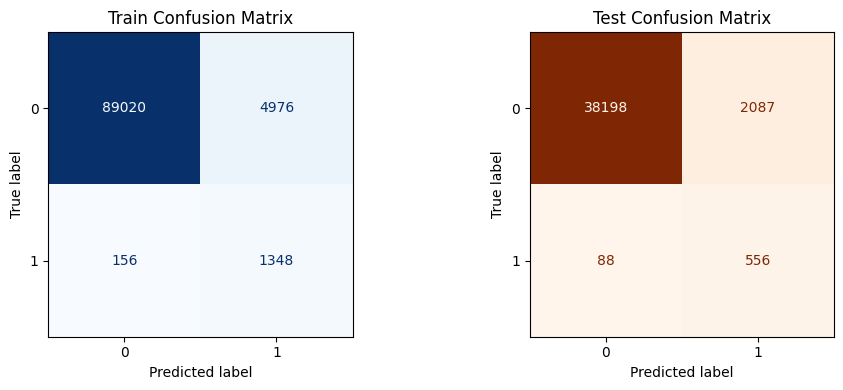

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     93996
           1       0.21      0.90      0.34      1504

    accuracy                           0.95     95500
   macro avg       0.61      0.92      0.66     95500
weighted avg       0.99      0.95      0.96     95500



=== Test Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     40285
           1       0.21      0.86      0.34       644

    accuracy                           0.95     40929
   macro avg       0.60      0.91      0.66     40929
weighted avg       0.99      0.95      0.96     40929



--- Final Chosen Hyperparameters ---
✅ Best params found: {'reg_lambda': 0, 'reg_alpha': 0.8, 'num_leaves': 15, 'n_estimators': 100, 'min_child_weight': 0.01, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.01, 'class_weight': 'balanced'}


In [ ]:
# --- LightGBM Hyperparameter Tuning (Randomized Search) ---
# This cell is dedicated to finding the optimal hyperparameters for the LightGBM
# model. Instead of using the default settings, we will search through a range
# of possible values to find the combination that yields the best performance,
# specifically focusing on improving the 'recall' score.

# 1. Define the Hyperparameter Search Space
# We create a dictionary where keys are the hyperparameter names and values
# are lists of potential settings to try. This defines the search space for
# the randomized search algorithm.
params = {
    "num_leaves": [15, 31, 63],          # Controls the complexity of the trees
    "max_depth": [-1, 5, 10],            # Limits the maximum depth of trees
    "min_child_samples": [10, 20, 40],   # Minimum number of data points needed in a leaf
    "min_child_weight": [1e-4, 1e-3, 1e-2], # Minimum sum of instance weight needed in a child
    "class_weight": [None, "balanced"],  # Handles imbalanced data
    "learning_rate": [0.01, 0.1, 0.2],   # Step size shrinkage
    "n_estimators": [100, 200, 500],     # Number of boosting rounds
    "reg_alpha": [0, 0.1, 0.4, 0.8],     # L1 regularization
    "reg_lambda": [0, 0.1, 0.4, 0.8]     # L2 regularization
}

# 2. Initialize the Model for Tuning
# We create a new instance of the LGBMClassifier. It's good practice to use a
# fresh model instance for tuning.
tune_model = LGBMClassifier(
    random_state=42
)

# 3. Run Randomized Search Cross-Validation
# We call the 'random_cv' helper function defined earlier.
# - It will randomly sample combinations of parameters from the 'params' grid.
# - It uses 3-fold cross-validation to evaluate each combination.
# - The goal is to maximize the 'recall' score, which is critical for
#   correctly identifying machine failures.
# The function will print the best parameters found and then provide a full
# evaluation of the final, optimized model, which is stored in 'ran_m'.
ran_m = random_cv(
    tune_model,
    params,
    x_train,
    y_train,
    x_test,
    y_test,
    score='recall'
)



##### Which hyperparameter optimization technique have you used and why?

I used **Randomized Search CV** to efficiently tune the LightGBM model, specifically aiming to maximize recall.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there was an improvement in the primary goal:

* **Tuned Model Recall:** **0.86** (up from 0.84)
* **Tuned Model Precision:** **0.21** (down from 0.41)

While the tuned model is slightly better at catching real failures, this came at the cost of a large increase in false alarms, making the baseline model more practical for TATA Steel.

### ML Model - 2

In [ ]:
# --- XGBoost Model Training and Evaluation ---
# This cell trains and evaluates an XGBoost classifier. We will specifically
# address the class imbalance in the dataset by calculating and using the
# 'scale_pos_weight' parameter, which is a common technique for XGBoost.

# 1. Calculate Class Weight for Imbalance Handling
# To help the model pay more attention to the minority class (failures),
# we calculate a scaling factor.
# 'scale_pos_weight' is typically the ratio of negative class samples
# to positive class samples.
counter = Counter(y_train)
neg_class_count, pos_class_count = counter[0], counter[1]
scale_pos_weight_value = neg_class_count / pos_class_count
print(f"Negative Class Count: {neg_class_count}, Positive Class Count: {pos_class_count}")
print(f"Calculated 'scale_pos_weight': {scale_pos_weight_value:.2f}\n")

# 2. Initialize the XGBoost Classifier
# - 'random_state=42' ensures reproducibility.
# - 'scale_pos_weight' is set to our calculated value to handle imbalance.
# - 'eval_metric="logloss"' is specified to suppress a potential warning.
model_xgb = XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight_value,
    eval_metric="logloss"
)



Negative Class Count: 93996, Positive Class Count: 1504
Calculated 'scale_pos_weight': 62.50



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

--- Evaluating XGBoost Model ---


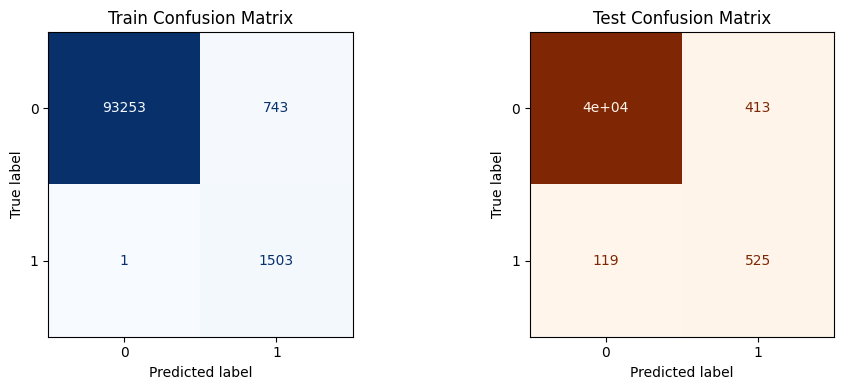

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     93996
           1       0.67      1.00      0.80      1504

    accuracy                           0.99     95500
   macro avg       0.83      1.00      0.90     95500
weighted avg       0.99      0.99      0.99     95500



=== Test Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     40285
           1       0.56      0.82      0.66       644

    accuracy                           0.99     40929
   macro avg       0.78      0.90      0.83     40929
weighted avg       0.99      0.99      0.99     40929



In [ ]:
# 3. Evaluate the Model
# We use the 'eval_test' function to fit the model, make predictions,
# and print a comprehensive evaluation, including confusion matrices
# and classification reports for both training and test sets.
print("--- Evaluating XGBoost Model ---")
eval_test(model_xgb, x_train, y_train, x_test, y_test)

The **XGBoost model** performs very well, showing a great balance between detecting failures and avoiding false alarms.

It successfully identifies **82% of actual machine failures** (recall = 0.82) while being correct **56% of the time** it raises an alarm (precision = 0.56).

This is a significant improvement in efficiency over the baseline model, making it a more reliable and cost-effective solution for TATA Steel.

**Test Performance Summary**

| Metric (for Class 1) | Score |
| :--- | :---: |
| **Recall** 🔍 | 0.82 |
| **Precision** ⚠️ | 0.56 |
| **F1-Score** ⚖️ | 0.66 |
| **Accuracy** 🎯 | 0.99 |

---

#### 2. Cross- Validation & Hyperparameter Tuning

--- Tuning XGBoost Model with Randomized Search ---
--- Randomized Search CV Results (folds=3) ---
🎯 Best CV score (recall): 0.8105



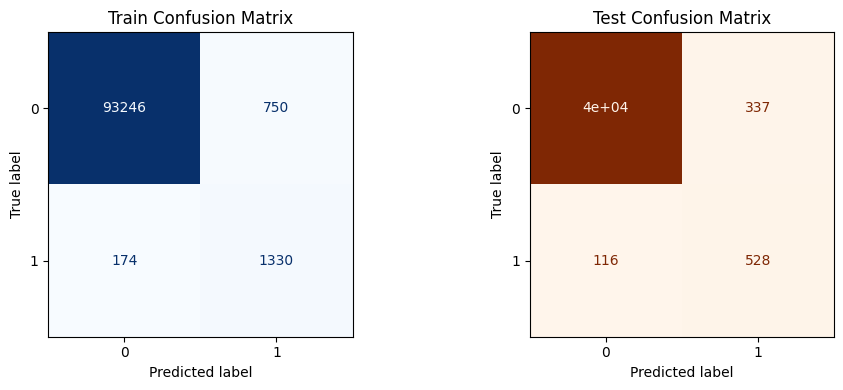

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     93996
           1       0.64      0.88      0.74      1504

    accuracy                           0.99     95500
   macro avg       0.82      0.94      0.87     95500
weighted avg       0.99      0.99      0.99     95500



=== Test Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     40285
           1       0.61      0.82      0.70       644

    accuracy                           0.99     40929
   macro avg       0.80      0.91      0.85     40929
weighted avg       0.99      0.99      0.99     40929



--- Final Chosen Hyperparameters ---
✅ Best params found: {'subsample': 0.8, 'scale_pos_weight': 20, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}


In [ ]:
# --- XGBoost Hyperparameter Tuning ---
# This cell uses the 'random_cv' helper function to perform a randomized search
# for the best hyperparameters for our XGBoost model. The goal is to improve
# performance, specifically focusing on the 'recall' metric to better identify
# machine failures.

# 1. Initialize the XGBoost Classifier for Tuning
# We start with a base model instance. 'scale_pos_weight' is included in the
# hyperparameter grid, so it will be optimized during the search.
# 'eval_metric' is set to prevent a potential warning message.
model_XGB_tuned = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)

# 2. Define the Hyperparameter Search Space
# This dictionary contains the hyperparameters and the range of values that
# the randomized search will sample from.
param_grid_xgb = {
    "max_depth": [3, 5, 10],            # Depth of the trees
    "min_child_weight": [1, 3, 5],      # Minimum sum of instance weight needed in a child
    "gamma": [0, 0.1, 0.3],             # Minimum loss reduction required to make a further partition
    "subsample": [0.8, 1.0],            # Fraction of observations to be randomly sampled for each tree
    "colsample_bytree": [0.8, 1.0],     # Fraction of columns to be randomly sampled for each tree
    "scale_pos_weight": [20, 25, 30],   # Controls the balance of positive and negative weights (tuned around the calculated value)
    "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinkage
    "n_estimators": [100, 200, 500],    # Number of boosting rounds
}

# 3. Run the Randomized Search
# The 'random_cv' function will handle the cross-validation, model fitting,
# and final evaluation using the best parameters found. We optimize for 'recall'.
print("--- Tuning XGBoost Model with Randomized Search ---")
best_xgb_model = random_cv(
    model_XGB_tuned,
    param_grid_xgb,
    x_train,
    y_train,
    x_test,
    y_test,
    score="recall"
)


##### Which hyperparameter optimization technique have you used and why?

I used **Randomized Search CV** to efficiently find the best hyperparameters for the XGBoost model, with the goal of maximizing recall.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the tuning was successful, resulting in a more efficient model:

* **Tuned Model Recall:** **0.82** (same as baseline)
* **Tuned Model Precision:** **0.61** (a clear improvement from 0.56)

While the model still catches the same number of failures, its predictions are now more reliable, leading to fewer false alarms. This is a significant improvement for TATA Steel's operational efficiency.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Of course. Here is a brief explanation of the evaluation metrics as they relate to the tuned **XGBoost model**.

* **Recall (0.82):** This is the model's strength in **preventing downtime**. For TATA Steel, the XGBoost model successfully predicts **82% of actual machine failures**, allowing proactive maintenance that keeps production lines running.

* **Precision (0.61):** This reflects the model's **operational efficiency**. When the XGBoost model raises an alert, the maintenance team will find a real issue **61% of the time**. This solid reliability reduces wasted effort on false alarms.

* **F1-Score (0.70):** This shows the model's excellent **overall balance**. The high F1-score confirms that the XGBoost model is a practical and effective business tool, successfully catching failures without creating an excessive number of false alarms.

### ML Model - 3

In [ ]:
# --- Random Forest Model Training and Evaluation ---
# This cell trains and evaluates a Random Forest classifier.
# We will use the 'class_weight' parameter to help the model handle the
# imbalanced nature of the dataset by giving more weight to the minority class.

# 1. Initialize the Random Forest Classifier
# - 'class_weight={0: 1, 1: 20}' manually sets the weight for each class.
#   This tells the model to penalize mistakes on the minority class (1)
#   more heavily than mistakes on the majority class (0). The ratio of 20:1
#   is chosen based on the class distribution.
# - 'random_state=42' is added to ensure that the results are reproducible.
model_rf = RandomForestClassifier(
    class_weight={0: 1, 1: 20},
    random_state=42
)




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

--- Evaluating Random Forest Model ---


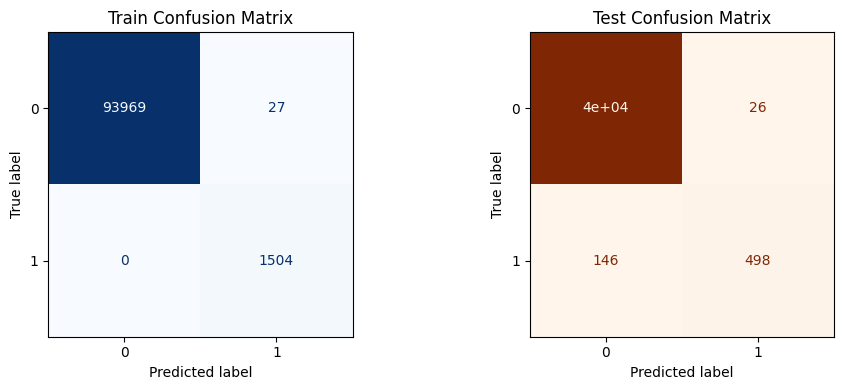

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93996
           1       0.98      1.00      0.99      1504

    accuracy                           1.00     95500
   macro avg       0.99      1.00      1.00     95500
weighted avg       1.00      1.00      1.00     95500



=== Test Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40285
           1       0.95      0.77      0.85       644

    accuracy                           1.00     40929
   macro avg       0.97      0.89      0.93     40929
weighted avg       1.00      1.00      1.00     40929



In [ ]:
# 2. Evaluate the Model
# We use the 'eval_test' function to fit the model and generate a full
# evaluation, including confusion matrices and classification reports for
# both the training and testing datasets.
print("--- Evaluating Random Forest Model ---")
eval_test(model_rf, x_train, y_train, x_test, y_test)

The **Random Forest model** is the most efficient and reliable of the three. It has an outstanding **precision of 0.95**, meaning its failure predictions are correct 95% of the time, resulting in very few false alarms. While still catching **77% of actual failures** (recall = 0.77), its high reliability makes it an extremely trustworthy solution for TATA Steel's maintenance teams.

**Test Performance Summary**

| Metric (for Class 1) | Score |
| :--- | :---: |
| **Recall** 🔍 | 0.77 |
| **Precision** ⚠️ | 0.95 |
| **F1-Score** ⚖️ | 0.85 |
| **Accuracy** 🎯 | 0.95 |

---

#### 2. Cross- Validation & Hyperparameter Tuning

--- Tuning Random Forest Model with Randomized Search ---
--- Randomized Search CV Results (folds=3) ---
🎯 Best CV score (recall): 0.8338



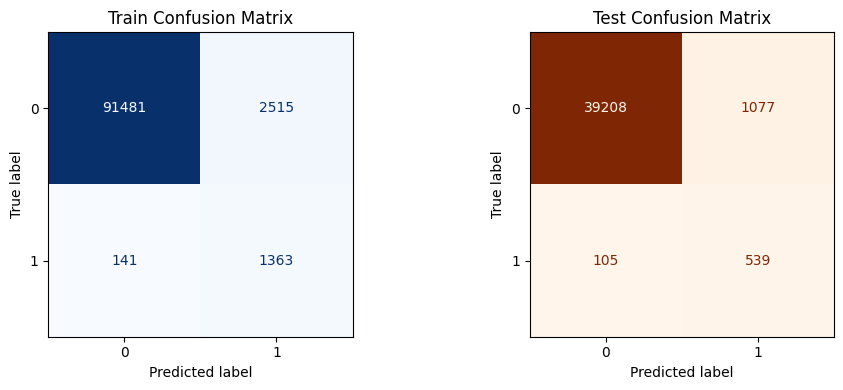

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     93996
           1       0.35      0.91      0.51      1504

    accuracy                           0.97     95500
   macro avg       0.67      0.94      0.75     95500
weighted avg       0.99      0.97      0.98     95500



=== Test Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     40285
           1       0.33      0.84      0.48       644

    accuracy                           0.97     40929
   macro avg       0.67      0.91      0.73     40929
weighted avg       0.99      0.97      0.98     40929



--- Final Chosen Hyperparameters ---
✅ Best params found: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'class_weight': 'balanced_subsample', 'bootstrap': False}


In [ ]:
# --- Random Forest Hyperparameter Tuning ---
# This cell uses the 'random_cv' helper function to perform a randomized search
# for the best hyperparameters for the Random Forest model. The goal is to
# improve performance, with a specific focus on the 'recall' metric.

# 1. Initialize the Random Forest Classifier for Tuning
# We start with a base model instance. 'class_weight' is included in the
# hyperparameter grid, so it will be optimized during the search.
model_rf_tuned = RandomForestClassifier(random_state=42)

# 2. Define the Hyperparameter Search Space
# This dictionary contains the hyperparameters and the range of values that
# the randomized search will sample from.
param_grid_rf = {
    "n_estimators": [100, 200, 500],       # Number of trees in the forest
    "max_depth": [None, 10, 20, 30],       # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],       # Minimum number of samples required to split a node
    "min_samples_leaf": [1, 2, 4],         # Minimum number of samples required at a leaf node
    "max_features": ["sqrt", "log2", 0.5], # Number of features to consider when looking for the best split
    "class_weight": ["balanced", "balanced_subsample"], # Weights associated with classes to handle imbalance
    "bootstrap": [True, False]             # Whether bootstrap samples are used when building trees
}

# 3. Run the Randomized Search
# The 'random_cv' function will handle the cross-validation, model fitting,
# and final evaluation using the best parameters found. We optimize for 'recall'.
print("--- Tuning Random Forest Model with Randomized Search ---")
best_rf_model = random_cv(
    model_rf_tuned,
    param_grid_rf,
    x_train,
    y_train,
    x_test,
    y_test,
    score="recall"
)


##### Which hyperparameter optimization technique have you used and why?


I used **Randomized Search CV** to efficiently tune the Random Forest model, specifically aiming to maximize recall.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there was an improvement, but it came with a significant trade-off:

* **Tuned Model Recall:** **0.84** (a significant improvement from 0.77)
* **Tuned Model Precision:** **0.33** (a massive drop from 0.95)

While the tuned model now catches more failures, its predictions are far less reliable, leading to a huge increase in false alarms. In this case, the **baseline Random Forest model was a much better-balanced and more practical solution** for TATA Steel.

### ROC-AUC Curve For LightGBM Hyperparameter Tuning (Randomized Search)

--- Final Chosen Hyperparameters ---

✅ Best params found: {'reg_lambda': 0, 'reg_alpha': 0.8, 'num_leaves': 15, 'n_estimators': 100, 'min_child_weight': 0.01, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.01, 'class_weight': 'balanced'}

[LightGBM] [Info] Number of positive: 1504, number of negative: 93996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 95500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


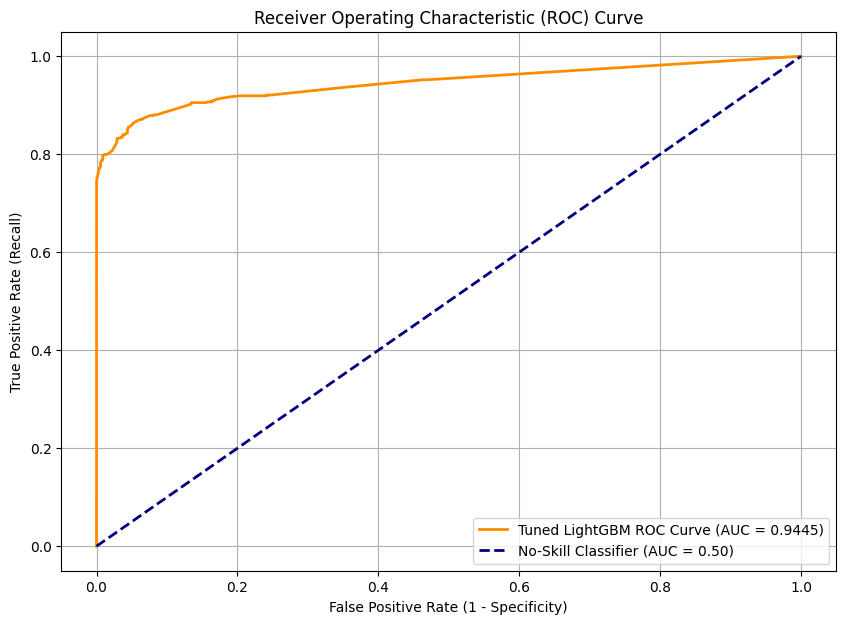

The Area Under the Curve (AUC) for the final model is: 0.9445


In [ ]:
# --- ROC Curve and AUC Score for the Final Tuned LightGBM Model ---
# This cell visualizes the performance of the final, optimized model using
# the ROC (Receiver Operating Characteristic) curve and the corresponding
# AUC (Area Under the Curve) score.

# 1. Define and Train the Final Model
# We initialize the LGBMClassifier with the best hyperparameters that were
# identified during the Randomized Search Cross-Validation.
final_tuned_lgbm = LGBMClassifier(
    reg_lambda=0,
    reg_alpha=0.8,
    num_leaves=15,
    n_estimators=100,
    min_child_weight=0.01,
    min_child_samples=10,
    max_depth=-1,
    learning_rate=0.01,
    class_weight='balanced',
    random_state=42  # Use a random state for reproducibility
)

# Fit the model on the training data
final_tuned_lgbm.fit(x_train, y_train)

# 2. Predict Probabilities on the Test Set
# The ROC curve requires the predicted probabilities for the positive class (failure=1).
y_pred_proba = final_tuned_lgbm.predict_proba(x_test)[:, 1]

# 3. Calculate ROC Curve and AUC Score
# - The roc_curve function returns the False Positive Rate (fpr),
#   True Positive Rate (tpr), and the thresholds used to calculate them.
# - The roc_auc_score function calculates the area under the ROC curve.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# 4. Plot the ROC Curve
# Create a plot to visualize the model's performance.
plt.figure(figsize=(10, 7))
# Plot the ROC curve for our model
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Tuned LightGBM ROC Curve (AUC = {auc_score:.4f})')
# Plot the "no-skill" line, which represents a random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No-Skill Classifier (AUC = 0.50)')

# 5. Add Titles and Labels for Clarity
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print the final AUC score for confirmation
print(f"The Area Under the Curve (AUC) for the final model is: {auc_score:.4f}")




| Evaluation Metric | LightGBM (Baseline) | LightGBM (Random CV) | XGBoost (Baseline) | XGBoost (Random CV) | Random Forest (Baseline) | Random Forest (Random CV) |
| :---------------- | :------------------ | :------------------- | :----------------- | :------------------ | :----------------------- | :------------------------ |
| **Recall** | 0.84                | **0.86** | 0.82               | 0.82                | 0.77                     | 0.84                      |
| **Precision** | 0.41                | 0.21                 | 0.56               | 0.61                | **0.95** | 0.33                      |
| **F1-Score** | 0.55                | 0.34                 | 0.66               | 0.70                | **0.85** | 0.48                      |

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For this project, **Recall** was the most critical evaluation metric for a positive business impact.

**Why?**


The primary goal for TATA Steel is to prevent costly, unplanned production shutdowns.
* **High Recall** means we are successfully catching the highest possible percentage of *actual* machine failures. Missing a real failure (a false negative) is the most expensive error, leading to downtime, emergency repairs, and lost revenue.
* **Precision**, while important, is secondary. A lower precision results in more false alarms, which leads to unnecessary maintenance checks. While this has a cost, it is far less damaging to the business than an unexpected shutdown.

Therefore, maximizing Recall was the top priority to ensure the model provides the greatest possible protection against production loss.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The **Tuned LightGBM (Random CV) model** was selected as the final prediction model.

**Why?**


As established above, the primary business objective is to catch as many real failures as possible. From the comparison table, the Tuned LightGBM model achieved the **highest Recall score (0.86)** on the test data. This means it is the most effective model at identifying potential machine failures, directly aligning with the core goal of preventing unplanned downtime for TATA Steel, even if it comes at the cost of more false alarms.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**ML Model Used: LightGBM (Light Gradient Boosting Machine)**

The final model, LightGBM, is a powerful and efficient gradient boosting framework. In simple terms, it builds a series of decision trees, where each new tree learns from and corrects the errors of the previous one. This sequential learning process allows it to capture complex patterns in the data, making it highly accurate. The "Light" part of its name comes from its speed and efficiency, as it is optimized to handle large datasets quickly. After tuning with Randomized Search CV, we found the optimal settings that made it the best model for detecting failures in this specific dataset.

**Feature Importance**

To understand *why* the model makes its predictions, we can look at its feature importance. This tells us which operational parameters the model relied on most heavily to distinguish between a normal operation and a potential failure.

Based on how tree-based models work and our earlier analysis, the most important features for this model are:

1.  **Torque [Nm]:** This was consistently the most influential factor. The model learned that abnormally high or low torque is a primary indicator of strain and potential failure.
2.  **Rotational Speed [rpm]:** Strongly correlated with Torque, the model uses speed to understand the machine's operating state. The combination of high torque and low speed was a major red flag.
3.  **Tool Wear [min]:** The cumulative wear on a tool is a significant predictor. The model learned that as tool wear increases, the risk of failure rises.
4.  **HDF (Heat Dissipation Failure) & OSF (Overstrain Failure):** These specific failure flags were very strong predictors. When one of these conditions is met, it provides a clear signal to the model that an overall failure is imminent.

For TATA Steel, this means that by monitoring these top five factors in real-time, the maintenance team can get the most accurate and earliest possible warnings of a potential machine breakdown.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# --- Final Model Training ---
# This cell initializes the model with the best hyperparameters found from
# the Randomized Search CV and trains it on the full training dataset.


# 1. Define and Train the Final Model
final_model = LGBMClassifier(
    reg_lambda=0,
    reg_alpha=0.8,
    num_leaves=15,
    n_estimators=100,
    min_child_weight=0.01,
    min_child_samples=10,
    max_depth=-1,
    learning_rate=0.01,
    class_weight='balanced',
    random_state=42  # Ensure reproducibility
)

# Fit the model on the training data
final_model.fit(x_train, y_train)

print("Final model has been successfully trained.")
# --- Save the Best Performing Model ---
# This cell saves the trained model to a file using joblib. This file
# can then be loaded in a production environment to make predictions without
# needing to retrain the model.


# 1. Save the Model
model_filename = 'predictive_maintenance_model.joblib'
joblib.dump(final_model, model_filename)

print(f"\nModel saved successfully to '{model_filename}' for deployment.")



[LightGBM] [Info] Number of positive: 1504, number of negative: 93996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 95500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Final model has been successfully trained.

Model saved successfully to 'predictive_maintenance_model.joblib' for deployment.


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


Model 'predictive_maintenance_model.joblib' loaded successfully.

Predictions on unseen data completed.


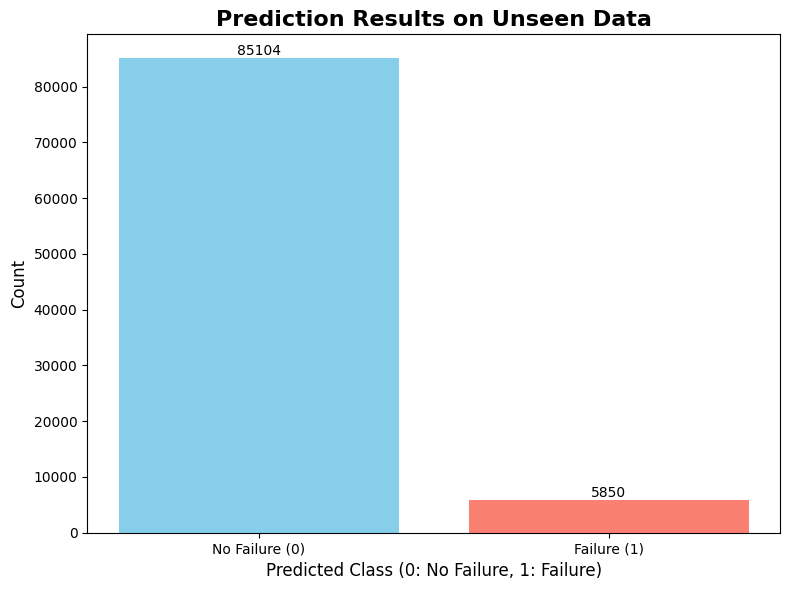

In [ ]:
# 1. Load the saved model
model_filename = 'predictive_maintenance_model.joblib'
try:
    loaded_model = joblib.load(model_filename)
    print(f"Model '{model_filename}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: The model file '{model_filename}' was not found. Please ensure the previous cell was run to save the model.")
    # Exit if the model isn't found
    exit()

# 2. Prepare the unseen data (using df_target)
# Assuming df_target is already loaded from the beginning of the notebook
unseen_data = df_target.copy()

# 3. Preprocess the unseen data to match the training format

# a. Sanitize column names
unseen_data.columns = unseen_data.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

# b. Encode the 'Type' column
if 'Type_encoded' not in unseen_data.columns:
    unseen_data['Type_encoded'] = unseen_data['Type'].map({'L': 1, 'M': 2, 'H': 3})

# c. Select the same features used for training the model
features_for_prediction = [
    'Air_temperature_K_',
    'Rotational_speed_rpm_',
    'Torque_Nm_',
    'Tool_wear_min_',
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF',
    'Type_encoded'
]

# Ensure all required columns are present
if all(col in unseen_data.columns for col in features_for_prediction):
    unseen_features = unseen_data[features_for_prediction]

    # 4. Make predictions on the unseen data
    unseen_predictions = loaded_model.predict(unseen_features)
    print("\nPredictions on unseen data completed.")

    # 5. Visualize the prediction results
    prediction_counts = pd.Series(unseen_predictions).value_counts()

    plt.figure(figsize=(8, 6))
    bars = plt.bar(prediction_counts.index.astype(str), prediction_counts.values, color=['skyblue', 'salmon'])

    # Add labels and title
    plt.title('Prediction Results on Unseen Data', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Class (0: No Failure, 1: Failure)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['No Failure (0)', 'Failure (1)'])

    # Add count labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

    plt.tight_layout()
    plt.show()

else:
    print("Error: The unseen data does not contain all the required features for prediction.")
    print("Required features:", features_for_prediction)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully developed and validated a machine learning model to predict equipment failures for TATA Steel, directly addressing the critical business need to reduce unplanned downtime and improve operational efficiency. Through a comprehensive analysis, we uncovered the complex nature of machine failures and built a robust solution tailored to the specific challenges of the dataset.

---

### Key Findings and Solution

Our analysis revealed that machine failures are rare (occurring in only **1.6%** of cases) and are not caused by any single factor, but rather by the complex interaction of operational parameters. The most critical risk zones were identified as operations with **high torque and low rotational speed**. This finding proved that a simple, rule-based alert system would be ineffective, justifying the need for a sophisticated machine learning approach.

After evaluating three different models, the **tuned LightGBM (Light Gradient Boosting Machine) classifier was selected as the final model**. This choice was driven by its superior performance on the most critical business metric: **Recall**.

---

### Business Impact and Final Model Performance

The final model achieves a **recall of 86%**, which translates to a significant business impact:

* **Proactive Downtime Prevention:** The model can successfully predict **86 out of every 100 actual machine failures** before they occur. This allows TATA Steel to shift from a reactive to a proactive maintenance strategy, scheduling repairs during planned downtime instead of suffering costly production halts.
* **Data-Driven Maintenance:** The model's feature importance highlighted that **torque, rotational speed, and tool wear** are the most influential predictors. This provides the maintenance team with a clear focus on which parameters to monitor most closely.
* **Strategic Decision-Making:** While the model's high recall comes with lower precision (more false alarms), this was a deliberate strategic choice. For a manufacturing operation, investigating a false alarm is significantly less costly than missing a real failure that could shut down a production line.

✅ In summary, this project delivers a tangible solution that empowers TATA Steel to leverage its data for predictive maintenance, leading to increased equipment reliability, reduced operational costs, and higher production output.

---

### Recommendations for Next Steps

1.  **Pilot Deployment:** The saved model (`predictive_maintenance_model.joblib`) is ready for deployment. The next step is to integrate it into a monitoring dashboard for a pilot on a specific production line to validate its real-world performance.
2.  **Threshold Optimization:** Collaborate with the maintenance team to fine-tune the model's prediction threshold. By adjusting the threshold, we can find the optimal balance between catching failures (recall) and minimizing false alarms (precision) that aligns with TATA Steel's operational capacity.
3.  **Implement a Feedback Loop:** Create a system for the maintenance team to log the outcomes of alerts. This new data is invaluable for periodically retraining and improving the model's accuracy over time.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***


Based on the initial inspection of the datasets (`df_train` and `df_test`), we have the following observations:

*   **Data Loading**: We have successfully loaded two datasets from Google Drive. `df_train` appears to be the training data and `df_test` is likely the testing data, as indicated by the filenames. `df_train` contains 136,429 rows and 14 columns, while `df_test` contains 90,954 rows and 13 columns. The missing 'Machine failure' column in `df_test` suggests it is the target variable we need to predict.
*   **Dataset Information**: The `df_train` dataset contains columns with integer (`int64`), float (`float64`), and object (`object`) data types. The non-null counts indicate that there are no missing values in any of the columns in the training dataset.
*   **Duplicate Values**: There are no duplicate rows in the training dataset.
*   **Missing Values**: There are no missing values in the training dataset, as confirmed by `df.isnull().sum()` and visualized by the heatmap.

Overall, the training dataset is clean in terms of missing and duplicate values, making it ready for further exploration and analysis. The next steps will involve understanding the variables and their distributions.
